# Projection of Percent Bleached Coral by Country and Year
# DTSC 691 Capstone Custom Machine Learning Project 
## By: Samuel Michael

# Introduction
As society continues to grow, so too does humanity’s impact on our environment. Our expenditure of fossil fuels and carbon emissions has had a domino effect, causing changes ranging from chaotic weather to physiological changes in animals. Some creatures adapt better than others, and corals are the antithesis of this, as they have been unable to cope with the rising temperatures in certain climates. Many draw a correlation between an increase in global temperature and mass coral bleaching events (Lesser, 2007).

Coral are an integral part of marine (and some freshwater) biosystems, as they provide both structure and nutrient hotspots for much of the ecosystem they exist alongside. When the rest of the ocean is as unproductive it is, the areas with coral become integral not only to sea-life but our coexistent lives as well. Corals provide an economical benefit as well, boosting tourism and fishery effectiveness just from their vibrant presence. Even their calcium carbonate skeleton allows for rigid strucuturing, preventing coastal damage (Hoegh-Guldberg, 1999). However, coral are under assault by various environmental factors, such as disease, overfishing, and bleaching. 

Coral bleaching is the focus of this brief data-based project and is named as such due to the ghastly pale color the coral takes when the algae symbiote leaves the coral structure. This algal cohort is important to the ecosystem the coral physically exists at, where a greater diversity of the cohorts- called zooxanthellae- leads to greater diversity of the entire coral-centered ecosystem (Rowan and Knowlton, 1995). When the algae is separated from the coral polyps, the coral degrades and eventually dies, and since the trigger is environmental, this can cause mass bleaching, impacting entire ecosystems. 
    
As a graduate of Biology, this subject has always fascinated me, and as an Environmental Educator, I enjoy educating others on the world around us. As temperatures continue to rise, I cannot sit idly by, so I came up with the following project to apply all areas of my expertise, including a solid chunk of what I learned from this Data Science program. As there is little current datasets available that combine temperature by country with coral bleaching by country, I see this as an opportunity to create such a dataset with existing sources, train a model to predict and impute any relevant missing data, and extrapolate to further predict bleaching instances in the future. The overall hypothesis is that an increase in a country’s surface air temperature should positively correlate with an increase in percent coral bleaching.


## Introduction Sources

Hoegh-Guldberg Ove (1999) Climate change, coral bleaching and the future of the world's coral reefs. Marine and Freshwater Research 50, 839-866.<br>
https://doi.org/10.1071/MF99078

Lesser, Michael P. (2007) Coral reef bleaching and global climate change: Can corals survive the next century? Proceedings of the National Academy of Sciences, vol. 104, 5259–5260.<br>
https://doi.org/10.1073/pnas.0700910104

Rowan, Rob and Knowlton, Nancy (1995) Intraspecific diversity and ecological zonation in coral-algal symbiosis. Proceedings of the National Academy of Sciences, vol. 92, 2850 - 2853<br>
https://doi.org/10.1073/pnas.92.7.2850

# Data description
## Data Sources
Data was taken from three different sources:

Dataset from the National Centers for Environmental Information (NCEI), and is labeled as the Global Coral Bleaching Database.
https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:0228498

Dataset built from previous databases, specifically ReefBase and Simon Donner’s website. Later data submitted directly to Coral
Reef Watch, a part of National Oceanic and Atmospheric Administration.

Dataset from University of Dayton consisting of major cities by average temperature. <br>
https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities?resource=download

Source archived from National Climatic Data Center, which houses the Global Summary of the Day, the database where these records are from.

Many country-specific datasets missing from dataset 2 were procured from World Bank Group, Climate Change Knowledge Portal.
https://climateknowledgeportal.worldbank.org/download-data

## Data Summary
### Global Coral Bleaching Database
Dataset consisting of 21 variables and 33244 recorded samples.<br>
Record ID-------Unique Id given to <br>
Country---------Country of coral sample e.g. ‘Guam’.<br>
Location--------Specific location of coral sample e.g. ‘Pago Bay’.<br>
Site Name-------Name of site reported, if available.<br>
Latitude--------Value expressing precise Latitude of coral sample. <br>
Longitude-------Value expressing precise Longitude of coral sample.<br>
Day-------------Day sample was taken.<br>
Month-----------Month sample taken, value pertaining to month e.g. 1 = January.<br>
Year------------Year sample taken, up to 2012. <br>
Depth-----------Depth of sample in meters.<br>
% Bleached------Percent of coral samples bleached.<br>
% Mortality-----Percent of mortality based on coral cover.<br>
Survey Type-----Type of survey conducted.<br>
Source----------Original reported source.<br>
Citation--------Manuscript description of report.<br>
Comments--------Miscellaneous extra information.<br>
Data PoC--------Observer name.<br>
PoC Email-------Observer email address.<br>
Coral Regions---Subsection of location of record, if applicable.<br>
Min% Bleached---Minimum bleach% if recorded as a range.<br>
Max% Bleached---Maximum bleach% if recorded as a range.<br>

To make this dataset suitable for merging, I will need to excise just about every irrelevant variable. The variables kept will be Country, Year, Depth, %Bleached, Min%Bleached, and Max%Bleached. I am keeping Depth as Depth may prove to be a strong correlator with increase in surface temperature, as the deeper the coral is, the less chance the increase in temperature may affect it, in theory. If Depth is too unreliable, I will drop it, as the main focus is %Bleached.

There are a few challenges with this dataset, namely inconsistency regarding how %Bleached is recorded. Depth is much more unreliable but is not the primary focus, %Bleached ultimately is. Since there are records of ranges instead of a static integer, it will be up to my discretion to determine how to proceed with the data manipulation. I’d imagine the best course of action would be to create a Dataframe that has range data, take the mean between the Min% and Max% bleached, and reinsert that into the primary dataset.

### Major Cities by Average Temperature
Dataset consisting of 8 variables and 2906327 recorded temperatures.<br>
Region----------Relative continent of record.<br>
Country---------Country pertaining to record.<br>
State-----------State pertaining to record.<br>
City------------Major city pertaining to record.<br>
Month-----------Month record taken.<br>
Day-------------Specific day of month record taken.<br>
Year------------Overall year when records were recorded.<br>
AvgTemperature--Average Climate Temperature, recorded in Fahrenheit (though it may be inconsistent)<br>

With over 2 million records of temperatures recorded, there will need to be a lot of shrinking this data down. I will need just AvgTemperature by a single Country per Year, so those three variables will be the goal for data manipulation pertaining to this specific dataset. To achieve this, I will need to combine the AvgTemperature of each Country by Year. So instead of say, with Algeria having 365 temperatures recorded in a single year (as readings are done daily), each of those averages will be added and divided by number of instances that year to get an average of that year, so we get a dataframe with Country and AvgTemperature by Year.

Potential challenges come with the sheer size of the dataset. I have yet to deal with anything over 1 million, let alone 2+ million, so I will need to be ultra-vigilant with how this data is handled. If adding all AvgTemperatures together based on Year crashes, I may need to take things slower, adding Countries one-by-one, which will take much longer. Hopefully excising Region, State, and City allows the operations to run smoothly enough to avoid any crashes.

### Climate Change Knowledge Portal Datasets
As the Major Cities by Average Temperature dataset does not have every country I need, I have borrowed data from the World Bank Group to add in any missing Countries. So far, I have 53 country-based datasets from this repository. They consist of Year, [Country Name], and [State/Territory Name] * n, where n = number of States or Territories.<br>
Year----------------Year temperature was recorded.<br>
Country-------------Country pertaining to record.<br>
States/Territories--Other segments related to the main country.<br>

Most work needed for these datasets is straightforward, keeping Country and Year while discarding any States or Territories. However, some of these datasets are a bit more complicated, containing information under Territories that could be of use,  so it’s important to examine each dataset for discrepancies. One such example is the antigua dataset, which is not just Antigua, but Barbuda too. So I would need to separate those two before discarding anything. Otherwise, this operation should be straightforward. 


First, prep all three types of dataframes to allow for combining of them all.

## Dataset 1: Global Coral Bleaching Database

First, I import all relevant packages for the data cleaning process

In [1]:
#import all important packages for future use
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns

Importing the Global Coral Bleaching Database and viewing what the columns are named. <br>
This allows me to know what exact columns to drop later.

In [2]:
#Importing data and viewing column names e.g. variables present
Data1 = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Global_Coral_Bleaching_Database.csv")
print(Data1.columns.values)

['RECORD_ID' 'COUNTRY' 'LOCATION' 'SITE_NAME' 'LATITUDE' 'LONGITUDE' 'DAY'
 'MONTH' 'YEAR' 'DEPTH' 'PERCENT_BLEACHED' 'PERCENT_MORTALITY'
 'SURVEY_TYPE' 'SOURCE' 'CITATION' 'COMMENTS' 'DATA_POINT_OF_CONTACT'
 'POC_E-MAIL_ADDRESS' 'CORAL_REGIONS' 'MIN_PERCENT_BLEACHED'
 'MAX_PERCENT_BLEACHED']


C:\Users\Samuel Michael\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Looking at what data we have
Data1

,RECORD_ID,COUNTRY,LOCATION,SITE_NAME,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,DEPTH,...,PERCENT_MORTALITY,SURVEY_TYPE,SOURCE,CITATION,COMMENTS,DATA_POINT_OF_CONTACT,POC_E-MAIL_ADDRESS,CORAL_REGIONS,MIN_PERCENT_BLEACHED,MAX_PERCENT_BLEACHED
0,100001,Jamaica,NaN,NaN,17.898040,-76.814140,NaN,NaN,1963,NaN,...,NaN,NaN,ReefBase,NaN,"Some of the surviving corals bleached (Goreau,...",NaN,NaN,Caribbean/GoM,NaN,NaN
1,100002,Colombia,Providencia Island (Isla de Providencia),NaN,13.358333,-81.383333,NaN,NaN,1969,1-20m,...,NaN,NaN,ReefBase,NaN,NaN,NaN,NaN,Caribbean/GoM,NaN,NaN
2,100003,Puerto Rico,Puerto Rico,NaN,17.866667,-66.433333,NaN,NaN,1969,NaN,...,NaN,NaN,ReefBase,NaN,An intensive and extensive bleaching event occ...,NaN,NaN,Caribbean/GoM,NaN,NaN
3,100004,United States,Florida,Middle Sambo Reef,24.490000,-81.675000,NaN,NaN,1973,NaN,...,NaN,NaN,ReefBase,NaN,Millepora complanata showed the greatest incid...,NaN,NaN,Caribbean/GoM,NaN,NaN
4,100007,British Virgin Islands,Anegada,NaN,18.733333,-64.316667,NaN,NaN,1979,NaN,...,NaN,NaN,ReefBase,NaN,Actual cause of bleaching is not known. Partia...,NaN,NaN,Caribbean/GoM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,CJ_528,Caribbean Netherlands,Bonaire,Mi Dushi,12.159920,-68.325850,NaN,NaN,2019,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,0.000000,0.000000
33240,CJ_529,Caribbean Netherlands,Bonaire,Mi Dushi,12.159920,-68.325850,NaN,NaN,2019,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,12.388503,12.388503
33241,CJ_530,Caribbean Netherlands,Bonaire,Ebo's Special,12.165780,-68.319250,NaN,NaN,2019,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,0.704225,0.704225
33242,CJ_531,Caribbean Netherlands,Bonaire,Ebo's Special,12.165780,-68.319250,NaN,NaN,2019,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Caribbean/GoM,47.368421,47.368421


Now I trim all the data I do not need. Depth is dropped here immediately as the recoverable information on Depth was lower than 1% of the recoverable information was for %Bleached. This high unreliability would do more harm than good in the long run.

In [4]:
#Dropping information we do not need
#At one point I wanted to keep depth, but due to how Depth was recorded, Depth was deemed too unreliable to be used for any model
Data1_trim = Data1.drop(['RECORD_ID', 'LOCATION', 'SITE_NAME', 'LATITUDE', 'LONGITUDE', 'DAY', 'MONTH', 'DEPTH', 'PERCENT_MORTALITY', 
                         'SURVEY_TYPE', 'SOURCE', 'CITATION', 'COMMENTS', 'DATA_POINT_OF_CONTACT', 'POC_E-MAIL_ADDRESS', 'CORAL_REGIONS',
                         ], axis=1)
Data1_trim

,COUNTRY,YEAR,PERCENT_BLEACHED,MIN_PERCENT_BLEACHED,MAX_PERCENT_BLEACHED
0,Jamaica,1963,NaN,NaN,NaN
1,Colombia,1969,NaN,NaN,NaN
2,Puerto Rico,1969,NaN,NaN,NaN
3,United States,1973,NaN,NaN,NaN
4,British Virgin Islands,1979,NaN,NaN,NaN
...,...,...,...,...,...
33239,Caribbean Netherlands,2019,0,0.000000,0.000000
33240,Caribbean Netherlands,2019,12.38850347,12.388503,12.388503
33241,Caribbean Netherlands,2019,0.704225352,0.704225,0.704225
33242,Caribbean Netherlands,2019,47.36842105,47.368421,47.368421


Next was disposing of any missing data in the min/max %bleached columns. These columns were the most important as they provided the best information on the true value of %Bleached. I could have imputed such information but most missing information was from old, unreliable information. Modern data is prioritized as that information gives us a more proper glimpse into the future I wish to predict.

In [5]:
#Drop any NaN answers
Data1_nonan = Data1_trim.dropna(subset=['MIN_PERCENT_BLEACHED', 'MAX_PERCENT_BLEACHED'])
Data1_nonan

,COUNTRY,YEAR,PERCENT_BLEACHED,MIN_PERCENT_BLEACHED,MAX_PERCENT_BLEACHED
36,Bahamas,1983,90,90.000000,90.000000
40,Comoros,1983,30%-45%,30.000000,45.000000
49,Ecuador,1983,50%-100%,50.000000,100.000000
54,Indonesia,1983,40,40.000000,40.000000
57,Indonesia,1983,50,50.000000,50.000000
...,...,...,...,...,...
33239,Caribbean Netherlands,2019,0,0.000000,0.000000
33240,Caribbean Netherlands,2019,12.38850347,12.388503,12.388503
33241,Caribbean Netherlands,2019,0.704225352,0.704225,0.704225
33242,Caribbean Netherlands,2019,47.36842105,47.368421,47.368421


The reason we prioritize min/max %Bleached rather than just %Bleached itself is that so %Bleached information was input as a range instead of the proper decimal format. This would normally make deciphering %Bleache dmuch more difficult, but thankfully we can simply take the mean of the combination of min/max %Bleached and effectively replace the %Bleached column with this.

In [6]:
#%Bleached is an object type, due to the use of ranges and percents in the column, so we will need to use Min and Max %Bleached
Data1_nonan.dtypes

COUNTRY                  object
YEAR                      int64
PERCENT_BLEACHED         object
MIN_PERCENT_BLEACHED    float64
MAX_PERCENT_BLEACHED    float64
dtype: object

In [7]:
#Drop %Bleached and make a new %Bleached using the average of the Min and Max %Bleached
Data1_nonan = Data1_nonan.drop(['PERCENT_BLEACHED'], axis=1)
Data1_nonan['PERCENT_BLEACHED'] = (Data1_nonan['MIN_PERCENT_BLEACHED'] + Data1_nonan['MAX_PERCENT_BLEACHED'])/2
Data1_nonan = Data1_nonan.drop(['MIN_PERCENT_BLEACHED', 'MAX_PERCENT_BLEACHED'], axis=1)
Data1_nonan

,COUNTRY,YEAR,PERCENT_BLEACHED
36,Bahamas,1983,90.000000
40,Comoros,1983,37.500000
49,Ecuador,1983,75.000000
54,Indonesia,1983,40.000000
57,Indonesia,1983,50.000000
...,...,...,...
33239,Caribbean Netherlands,2019,0.000000
33240,Caribbean Netherlands,2019,12.388503
33241,Caribbean Netherlands,2019,0.704225
33242,Caribbean Netherlands,2019,47.368421


Now, there is a major issue with the way %Bleached is recorded in the Global Coral Bleaching database. The large majority of %Bleached is recorded as a proportion of 100 to 0, however it appears there are records between <1 and >0 where it appears the proportion is written much smaller than it should be. This could be just literally, for example, 0.5 out of 100 %Bleached, however I do not think that anybody would be so precise, so for these records, I decided to multiply them by 100 to conform to the rest of the data.

In [8]:
Data1_nonan['PERCENT_BLEACHED'] = Data1_nonan['PERCENT_BLEACHED'].apply(lambda x: x*100 if x < 1 else x)
Data1_nonan['PERCENT_BLEACHED'] = Data1_nonan['PERCENT_BLEACHED'].apply(lambda x: x*100 if x < 1 else x)
Data1_nonan[(Data1_nonan['PERCENT_BLEACHED'] < 1) & (Data1_nonan['PERCENT_BLEACHED'] > 0)]

,COUNTRY,YEAR,PERCENT_BLEACHED


Now that we have trimmed down our dataset, it's important to investigate how many representative data points we have per country. 

In [9]:
#Check to see the amount of records per country
Data1_nonan.value_counts('COUNTRY')

COUNTRY
United States          6658
Australia              4865
Malaysia               2106
Philippines            1475
U.S. Virgin Islands    1413
                       ... 
Barbuda                   1
Tuvalu                    1
Eritrea                   1
Micronesia                1
Guadeloupe                1
Length: 109, dtype: int64

In [10]:
#Some countries such as Barbuda only have a few entries. Barbuda here only has a single one
Data1_nonan[Data1_nonan['COUNTRY'].str.match('Barbuda')]

,COUNTRY,YEAR,PERCENT_BLEACHED
2489,Barbuda,2003,5.0


Due to the low number of certain countries, I will need to set up a threshold number of minimum data points.

In [11]:
#I will need a cutoff to have only countries with decent enough representation
counts = Data1_nonan['COUNTRY'].value_counts()
#The cutoff will be at a minimum 100 entries by country
Data1_nonan = Data1_nonan[Data1_nonan['COUNTRY'].isin(counts[counts>=100].index)]
Data1_nonan

,COUNTRY,YEAR,PERCENT_BLEACHED
36,Bahamas,1983,90.0
40,Comoros,1983,37.5
54,Indonesia,1983,40.0
57,Indonesia,1983,50.0
62,Panama,1983,22.7
...,...,...,...
33179,"Florida, US",2020,5.5
33180,"Florida, US",2020,5.5
33181,"Florida, US",2020,5.5
33182,"Florida, US",2020,5.5


In [12]:
Data1_nonan.value_counts('COUNTRY')

COUNTRY
United States               6658
Australia                   4865
Malaysia                    2106
Philippines                 1475
U.S. Virgin Islands         1413
Mexico                      1389
Indonesia                    628
French Polynesia             603
Belize                       511
Japan                        479
New Caledonia                450
Honduras                     444
Cuba                         423
France                       394
Fiji                         392
Jamaica                      385
Maldives                     353
Vietnam                      351
Egypt                        340
Puerto Rico                  329
Reunion                      295
Netherlands Antilles         280
Florida, US                  268
Thailand                     258
Brazil                       238
Taiwan                       222
Palau                        218
Guam                         205
Tanzania                     203
India                        193
Ba

Now that we have our three important columns, I rename them to fit with the future datasets, which makes merging possible.

In [13]:
Data1_nonan = Data1_nonan.rename(columns={'COUNTRY':'Country','YEAR':'Year','PERCENT_BLEACHED':'Percent Bleached'})
Data1_nonan

,Country,Year,Percent Bleached
36,Bahamas,1983,90.0
40,Comoros,1983,37.5
54,Indonesia,1983,40.0
57,Indonesia,1983,50.0
62,Panama,1983,22.7
...,...,...,...
33179,"Florida, US",2020,5.5
33180,"Florida, US",2020,5.5
33181,"Florida, US",2020,5.5
33182,"Florida, US",2020,5.5


## Dataset 2: Major Cities by Average Temperature

This dataset was very promising at first, however due to inconsistent temperature was recorded, I ended up only using this dataset for a single country, Taiwan, which was eventually dropped due to unreliable %Bleached recordings as seen in the final errors near the tail end of the machine learning segment. So, this entire section was useless in the end, but it's important to chronicle what steps I took despite this.

First we initialize the dataset and take a look at what we are dealing with.

In [14]:
#Import second dataset and view the dataset
Data2 = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/city_temperature.csv")
Data2

C:\Users\Samuel Michael\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


To make sure we are dealing with relevant information, the unique countries in both the Global Bleaching Database and this dataset are put into their own lists, with the interesectioning and matching strings of both being printed here.

In [15]:
Data11 = Data1_nonan['Country'].unique()
Data22 = Data2['Country'].unique()
print(np.intersect1d(Data11, Data22))

['Australia' 'Bahamas' 'Belize' 'Brazil' 'China' 'Colombia' 'Cuba' 'Egypt'
 'France' 'Honduras' 'India' 'Indonesia' 'Japan' 'Kenya' 'Madagascar'
 'Malaysia' 'Mexico' 'Panama' 'Philippines' 'Taiwan' 'Tanzania' 'Thailand'
 'Vietnam']


In [16]:
#Thankfully, all variables are of the type they frankly should be.
Data2.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

A major issue with this dataset is the lack of consistency regarding AvgTemperature. At first it appears it is all in Fahrenheit, but some recordings seem to be in Celsius. This single issue greatly mars the reliability of this dataset, but can be banadaged by simply converting Fahrenheit to Celsius using the function below, which is then applied across the entire column.

In [17]:
def f2c(x):
    x = (x-32)*(5/9)
    return float(x)

Data2['AvgTemperature'] = Data2['AvgTemperature'].apply(f2c)
Data2

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,17.888889
1,Africa,Algeria,NaN,Algiers,1,2,1995,9.666667
2,Africa,Algeria,NaN,Algiers,1,3,1995,9.333333
3,Africa,Algeria,NaN,Algiers,1,4,1995,8.000000
4,Africa,Algeria,NaN,Algiers,1,5,1995,8.833333
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.000000
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.555556
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.000000
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.777778


In [18]:
Data2.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,1.333607e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,1.784644e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-7.277778e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,7.666667e+00
50%,6.000000e+00,1.600000e+01,2.007000e+03,1.694444e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,2.416667e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,4.333333e+01


A mean AvgTemperature of 13 is somewhat realistic, but a minimum AvgTemperature of -72 is clearly not, so again the data proves to be unreliable.

In [19]:
#Grouping by country and year, we can get the mean of the Average Temperature
Data2_temp = Data2.groupby(['Country', 'Year'], as_index=False)['AvgTemperature'].mean()
Data2_temp

,Country,Year,AvgTemperature
0,Albania,1995,-72.777778
1,Albania,1996,-72.777778
2,Albania,1997,-66.793760
3,Albania,1998,-43.442161
4,Albania,1999,-2.946575
...,...,...,...
3096,Zambia,2010,19.039878
3097,Zambia,2011,16.927093
3098,Zambia,2012,20.202489
3099,Zambia,2013,-0.524353


After looking through all the countries in this particular dataset that are in common with the Global Bleaching Database, only Taiwan was present here and not in the Climate Change Knowledge datasets. So, instead of combing through the dataset for relevant information, I decided to just pull Taiwan out and use just Taiwan itself and nothing else from the Major City Temperature dataset.

In [20]:
Taiwan = Data2_temp.loc[Data2_temp['Country'] == 'Taiwan']
Taiwan

,Country,Year,AvgTemperature
2595,Taiwan,1995,22.790868
2596,Taiwan,1996,22.999696
2597,Taiwan,1997,22.859817
2598,Taiwan,1998,22.348706
2599,Taiwan,1999,-11.714764
2600,Taiwan,2000,2.249545
2601,Taiwan,2001,21.604262
2602,Taiwan,2002,22.831355
2603,Taiwan,2003,23.268493
2604,Taiwan,2004,23.039010


Even within a single country there are outliers, another symptom of unreliability within this dataset. 

In [21]:
#Clearly there are two outliers here in 1999 and 2000
Taiwan = Taiwan[Taiwan['AvgTemperature'] > 3]
Taiwan

,Country,Year,AvgTemperature
2595,Taiwan,1995,22.790868
2596,Taiwan,1996,22.999696
2597,Taiwan,1997,22.859817
2598,Taiwan,1998,22.348706
2601,Taiwan,2001,21.604262
2602,Taiwan,2002,22.831355
2603,Taiwan,2003,23.268493
2604,Taiwan,2004,23.039010
2605,Taiwan,2005,23.123896
2606,Taiwan,2006,23.549011


In [22]:
print(np.intersect1d(Data11, Data22))

['Australia' 'Bahamas' 'Belize' 'Brazil' 'China' 'Colombia' 'Cuba' 'Egypt'
 'France' 'Honduras' 'India' 'Indonesia' 'Japan' 'Kenya' 'Madagascar'
 'Malaysia' 'Mexico' 'Panama' 'Philippines' 'Taiwan' 'Tanzania' 'Thailand'
 'Vietnam']


## Missing Temperature Data
Now I will need to manually track down each Country used in the Global Bleaching Database by integrating the datasets found in the Climate Change Knowledge data website. <br>
The issue with doing this is that there is no way to import multiple countries into one dataset, so each country will need to be initialized manually, with certain quirks in each dataset causing issues, though most are straightforward enough to be inserted into a function for prep.

In [23]:
#List of all missing countries in alphabetical order
Data33 = [x for x in Data11 if x not in set(Data22)]
Data33.sort()
Data33

['American Samoa',
 'British Virgin Islands',
 'Cambodia',
 'Comoros',
 'Fiji',
 'Florida, US',
 'French Polynesia',
 'Guam',
 'Iles eparses',
 'Jamaica',
 'Maldives',
 'Mauritius',
 'Netherlands Antilles',
 'New Caledonia',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Reunion',
 'Seychelles',
 'Solomon Islands',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'U.S. Virgin Islands',
 'United States']

In [24]:
#Iles eparses are nonspecific islands already present, so we will not use this data
#India, Philippines have an extra space
#United States vs US

This function is the generic function used to prep each country that is straightforward enough to allow for its use.<br>
The actual DataFrame is passed, as well as the name of the Country as a string.<br>
A dummy Dataframe is made up of the specific column pertaining to the Country, as many of these Dataframe have the Country as well as major cities as columns.<br>
Data types are set to their correct type, and the index is set to the appropriate Year. <br>
Country is renamed to AvgTemperature, the index dummy column is dropped, and the Country column is added.<br>
The resulting Dataframe is compatible with our Global Bleaching Database Dataframe!

In [25]:
def Convert(DataFrame, Country):
    DataFrame = DataFrame[[Country]]
    DataFrame[Country] = pd.to_numeric(DataFrame[Country],errors='coerce')
    DataFrame['Year'] = DataFrame.index
    DataFrame = DataFrame.reset_index()
    DataFrame = DataFrame.rename(columns={Country:'AvgTemperature'})
    DataFrame = DataFrame.drop(['index'], axis=1)
    DataFrame['Country'] = Country
    DataFrame = DataFrame.dropna()
    return DataFrame
#Disable annoying false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

### American Samoa

All Timeseries datafiles pertaining to Countries from the Climate Change Knowledge repository have strange column names that do not match the relevant information. They are blank with the last two being 'Variable:' and 'tas' respectively. This moves the actual names down to their own row and causes issues regarding index and datatype. This can be avoided by simply opening the .txt file of the Timeseries and deleting the first row which has the 'Variable:' and 'tas', which places the column names in the appropriate spots. These can be removed once imported too, as show here in American Samoa.

In [26]:
American_Samoa = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/American_Samoa.csv")
American_Samoa.head()

,Variable:,tas
NaN,American Samoa,Administrative unit not available
1901.0,26.20,26.20
1902.0,26.20,26.20
1903.0,25.95,25.95
1904.0,25.69,25.69


In [27]:
American_Samoa.dtypes

Variable:    object
tas          object
dtype: object

In [28]:
American_Samoa['Variable:'] = pd.to_numeric(American_Samoa['Variable:'],errors='coerce')
American_Samoa

,Variable:,tas
NaN,NaN,Administrative unit not available
1901.0,26.20,26.20
1902.0,26.20,26.20
1903.0,25.95,25.95
1904.0,25.69,25.69
...,...,...
2017.0,27.48,27.48
2018.0,27.33,27.33
2019.0,27.56,27.56
2020.0,27.52,27.52


In [29]:
American_Samoa.dtypes

Variable:    float64
tas           object
dtype: object

In [30]:
American_Samoa['Year'] = American_Samoa.index
American_Samoa = American_Samoa.reset_index()
American_Samoa = American_Samoa.rename(columns={'Variable:':'AvgTemperature'})
American_Samoa = American_Samoa.drop(['tas', 'index'], axis=1)
American_Samoa['Country'] = 'American Samoa'
American_Samoa = American_Samoa.dropna()
American_Samoa

,AvgTemperature,Year,Country
1,26.20,1901.0,American Samoa
2,26.20,1902.0,American Samoa
3,25.95,1903.0,American Samoa
4,25.69,1904.0,American Samoa
5,25.77,1905.0,American Samoa
...,...,...,...
117,27.48,2017.0,American Samoa
118,27.33,2018.0,American Samoa
119,27.56,2019.0,American Samoa
120,27.52,2020.0,American Samoa


### Australia

The rest of the Timeseries I imported I had removed the dummy column names to make the process smoother. I simply inspected each Country with .head() and looked for any discrepancies, and if everything looked fine, I ran the Dataframe through the Convert function mentioned earlier.

In [31]:
Australia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Australia.csv")
Australia.head()

,Australia,Australian Capital Territory,Coral Sea Islands Territory,New South Wales,Northern Territory,Other Territories,Queensland,South Australia,Tasmania,Victoria,Western Australia
1901,21.53,11.29,NaN,17.55,24.85,17.15,23.14,18.93,9.89,14.11,21.92
1902,21.53,11.25,NaN,17.54,25.10,17.09,23.24,18.95,9.76,14.05,21.71
1903,21.18,10.80,NaN,17.03,24.63,16.71,22.85,18.36,9.76,13.68,21.59
1904,21.11,10.73,NaN,16.93,24.20,16.55,22.71,18.37,9.79,13.71,21.71
1905,21.19,10.44,NaN,16.69,24.85,16.35,22.74,18.27,9.64,13.40,21.75


In [32]:
Australia = Convert(Australia, 'Australia')
Australia

,AvgTemperature,Year,Country
0,21.53,1901,Australia
1,21.53,1902,Australia
2,21.18,1903,Australia
3,21.11,1904,Australia
4,21.19,1905,Australia
...,...,...,...
116,22.49,2017,Australia
117,22.49,2018,Australia
118,22.79,2019,Australia
119,22.57,2020,Australia


### Bahamas

In [33]:
Bahamas = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Bahamas.csv")
Bahamas.head()

,"Bahamas, The",Administrative unit not available
1901,23.25,23.81
1902,24.07,24.48
1903,23.79,24.25
1904,23.77,24.21
1905,24.35,24.74


In [34]:
Bahamas = Bahamas.rename(columns={'Bahamas, The':'Bahamas'})
Bahamas = Convert(Bahamas, 'Bahamas')
Bahamas

,AvgTemperature,Year,Country
0,23.25,1901,Bahamas
1,24.07,1902,Bahamas
2,23.79,1903,Bahamas
3,23.77,1904,Bahamas
4,24.35,1905,Bahamas
...,...,...,...
116,25.69,2017,Bahamas
117,25.47,2018,Bahamas
118,25.96,2019,Bahamas
119,25.99,2020,Bahamas


### Belize

In [35]:
Belize = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Belize.csv")
Belize.head()

,Belize,Belize.1,Cayo,Corozal,Orange Walk,Stann Creek,Toledo
1901,24.93,25.41,24.36,25.35,25.28,24.84,24.76
1902,25.14,25.66,24.53,25.68,25.52,25.03,24.89
1903,25.12,25.63,24.53,25.66,25.49,25.02,24.88
1904,24.98,25.48,24.40,25.48,25.34,24.88,24.77
1905,25.09,25.61,24.48,25.66,25.46,24.98,24.82


In [36]:
Belize = Convert(Belize, 'Belize')
Belize

,AvgTemperature,Year,Country
0,24.93,1901,Belize
1,25.14,1902,Belize
2,25.12,1903,Belize
3,24.98,1904,Belize
4,25.09,1905,Belize
...,...,...,...
116,26.09,2017,Belize
117,25.53,2018,Belize
118,26.05,2019,Belize
119,26.38,2020,Belize


### Brazil

In [37]:
Brazil = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Brazil.csv")
Brazil.head()

,Brazil,Acre,Alagoas,Amapa,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,...,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins,Name Unknown,Name Unknown.1,Name Unknown.2,Name Unknown.3
1901,24.91,25.31,24.87,26.53,26.30,24.11,26.44,21.36,21.63,24.38,...,26.53,26.24,16.78,20.67,25.36,26.38,26.38,24.51,24.51,24.51
1902,25.04,25.31,25.03,26.69,26.30,24.25,26.64,21.52,22.55,24.48,...,26.43,26.14,17.49,21.48,25.50,26.34,26.34,24.51,24.51,24.51
1903,24.87,25.11,25.00,26.68,26.28,24.22,26.60,21.36,22.21,24.19,...,26.27,26.14,16.95,21.01,25.47,26.27,26.27,24.51,24.51,24.51
1904,24.66,25.02,24.52,26.30,26.26,23.98,25.99,21.25,21.97,23.98,...,26.10,25.88,16.90,20.86,25.06,26.17,26.17,24.52,24.52,24.52
1905,24.84,25.25,24.66,26.45,26.29,24.08,26.17,21.43,22.27,24.31,...,26.38,26.06,16.80,20.95,25.17,26.30,26.30,24.51,24.51,24.51


In [38]:
Brazil = Convert(Brazil, 'Brazil')
Brazil

,AvgTemperature,Year,Country
0,24.91,1901,Brazil
1,25.04,1902,Brazil
2,24.87,1903,Brazil
3,24.66,1904,Brazil
4,24.84,1905,Brazil
...,...,...,...
116,25.77,2017,Brazil
117,25.59,2018,Brazil
118,25.94,2019,Brazil
119,25.93,2020,Brazil


### British Virgin Islands

In [39]:
British_Virgin_Islands = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/British_Virgin_Islands.csv")
British_Virgin_Islands.head()

,British Virgin Islands,Anegada,Jost van Dyke,Other Islands,Tortola,Virgin Gorda
1901,25.69,25.69,25.69,25.69,25.69,25.69
1902,25.28,25.28,25.28,25.28,25.28,25.28
1903,25.38,25.38,25.38,25.38,25.38,25.38
1904,24.85,24.85,24.85,24.85,24.85,24.85
1905,25.23,25.23,25.23,25.23,25.23,25.23


In [40]:
British_Virgin_Islands = Convert(British_Virgin_Islands, 'British Virgin Islands')
British_Virgin_Islands

,AvgTemperature,Year,Country
0,25.69,1901,British Virgin Islands
1,25.28,1902,British Virgin Islands
2,25.38,1903,British Virgin Islands
3,24.85,1904,British Virgin Islands
4,25.23,1905,British Virgin Islands
...,...,...,...
116,26.86,2017,British Virgin Islands
117,26.53,2018,British Virgin Islands
118,26.99,2019,British Virgin Islands
119,26.97,2020,British Virgin Islands


### Cambodia

In [41]:
Cambodia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Cambodia.csv")
Cambodia.head()

,Cambodia,Banteay Meanchey,Battambang,Kampong Cham,Kampong Chhnang,Kampong Speu,Kampong Thom,Kampot,Kandal,Koh Kong,...,Preah Vihear,Prey Veng,Pursat,Ratanak Kiri,Siem Reap,Stung Treng,Svay Rieng,Takeo,Area under National Administration 2,Area under National Administration 1
1901,26.86,27.81,27.32,27.33,27.28,26.74,27.33,26.94,27.64,26.17,...,27.13,27.60,26.33,25.56,27.56,26.51,27.54,27.53,27.62,27.62
1902,26.87,27.79,27.32,27.36,27.30,26.76,27.36,26.97,27.67,26.19,...,27.14,27.64,26.35,25.58,27.57,26.53,27.57,27.56,27.64,27.64
1903,26.59,27.41,26.94,27.13,27.01,26.47,27.08,26.70,27.42,25.86,...,26.84,27.41,25.99,25.41,27.20,26.31,27.36,27.32,27.29,27.29
1904,26.42,27.27,26.79,26.93,26.82,26.28,26.89,26.51,27.23,25.69,...,26.66,27.21,25.82,25.25,27.06,26.12,27.18,27.13,27.13,27.13
1905,27.66,28.64,28.17,28.12,28.14,27.61,28.17,27.78,28.47,27.06,...,27.96,28.39,27.22,26.17,28.44,27.25,28.26,28.36,28.50,28.50


In [42]:
Cambodia = Convert(Cambodia, 'Cambodia')
Cambodia

,AvgTemperature,Year,Country
0,26.86,1901,Cambodia
1,26.87,1902,Cambodia
2,26.59,1903,Cambodia
3,26.42,1904,Cambodia
4,27.66,1905,Cambodia
...,...,...,...
116,27.45,2017,Cambodia
117,27.48,2018,Cambodia
118,27.99,2019,Cambodia
119,27.90,2020,Cambodia


### China

In [43]:
China = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/China.csv")
China.head()

,China,Anhui Sheng,Beijing Shi,Chongqing Shi,Fujian Sheng,Gansu Sheng,Guangdong Sheng,Guangxi Zhuangzu Zizhiqu,Guizhou Sheng,Hainan Sheng,...,Shaanxi Sheng,Shandong Sheng,Shanghai Shi,Shanxi Sheng,Sichuan Sheng,Tianjin Shi,Xinjiang Uygur Zizhiqu,Xizang Zizhiqu,Yunnan Sheng,Zhejiang Sheng
1901,6.67,14.93,9.70,15.62,17.55,5.24,20.61,20.11,15.22,24.25,...,10.37,12.44,15.21,8.08,8.11,12.02,5.14,-2.46,15.48,15.46
1902,6.75,15.75,10.42,15.66,18.14,5.24,21.18,20.58,15.38,24.77,...,10.46,13.42,15.98,8.56,7.89,12.89,5.43,-2.57,15.20,16.16
1903,6.57,15.09,9.98,15.60,17.48,5.24,20.45,19.89,15.12,24.02,...,10.40,12.80,15.44,8.27,8.02,12.35,4.65,-2.61,15.36,15.51
1904,6.54,15.09,9.94,15.57,17.39,5.21,20.35,19.86,15.10,24.01,...,10.37,12.79,15.42,8.24,7.92,12.34,5.34,-2.73,15.22,15.50
1905,6.46,15.30,9.62,15.11,17.89,5.19,20.79,19.98,14.99,24.09,...,10.03,12.73,15.76,8.04,7.81,12.04,4.82,-3.00,15.17,15.93


In [44]:
China = Convert(China, 'China')
China

,AvgTemperature,Year,Country
0,6.67,1901,China
1,6.75,1902,China
2,6.57,1903,China
3,6.54,1904,China
4,6.46,1905,China
...,...,...,...
116,8.10,2017,China
117,7.75,2018,China
118,8.01,2019,China
119,7.89,2020,China


### Colombia

In [45]:
Colombia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Colombia.csv")
Colombia.head()

,Colombia,Amazonas,Antioquia,Arauca,Atlantico,Bolivar,Boyaca,Buenaventura,Caldas,Caqueta,...,Putumayo,Quindio,Risaralda,San Andres Y Providencia,Santander,Sucre,Tolima,Valle Del Cauca,Vaupes,Vichada
1901,24.49,26.23,22.84,25.40,27.81,26.80,16.39,19.26,19.50,25.17,...,23.99,17.67,20.56,27.17,22.37,27.62,19.72,21.4,25.83,27.28
1902,24.39,26.23,22.79,25.03,27.66,26.62,16.22,19.26,19.48,25.17,...,23.99,17.67,20.56,27.17,22.18,27.48,19.71,21.4,25.82,26.98
1903,24.42,26.23,22.80,25.12,27.70,26.66,16.26,19.26,19.48,25.17,...,23.99,17.67,20.56,27.17,22.23,27.52,19.71,21.4,25.82,27.05
1904,24.42,26.23,22.80,25.15,27.70,26.68,16.27,19.26,19.48,25.17,...,23.99,17.67,20.56,27.17,22.25,27.53,19.71,21.4,25.82,27.08
1905,24.36,26.23,22.77,24.91,27.60,26.57,16.16,19.26,19.47,25.17,...,23.99,17.67,20.56,27.17,22.12,27.44,19.71,21.4,25.82,26.89


In [46]:
Colombia = Convert(Colombia, 'Colombia')
Colombia

,AvgTemperature,Year,Country
0,24.49,1901,Colombia
1,24.39,1902,Colombia
2,24.42,1903,Colombia
3,24.42,1904,Colombia
4,24.36,1905,Colombia
...,...,...,...
116,25.11,2017,Colombia
117,25.04,2018,Colombia
118,25.42,2019,Colombia
119,25.36,2020,Colombia


### Comoros

In [47]:
Comoros = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Comoros.csv")
Comoros.head()

,Comoros,Anjouan,Moheli,Ngazidja
1901,22.80,23.46,24.40,22.93
1902,23.03,23.64,24.61,23.17
1903,22.89,23.50,24.48,23.02
1904,22.74,23.44,24.38,22.87
1905,22.98,23.59,24.56,23.11


In [48]:
Comoros = Convert(Comoros, 'Comoros')
Comoros

,AvgTemperature,Year,Country
0,22.80,1901,Comoros
1,23.03,1902,Comoros
2,22.89,1903,Comoros
3,22.74,1904,Comoros
4,22.98,1905,Comoros
...,...,...,...
116,23.66,2017,Comoros
117,23.46,2018,Comoros
118,23.82,2019,Comoros
119,23.76,2020,Comoros


### Cuba

In [49]:
Cuba = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Cuba.csv")
Cuba.head()

,Cuba,Camaguey,Ciego De Avila,Cienfuegos,Ciudad De La Habana,Granma,Guantanamo,Holguin,Isla De La Juventud,La Habana,Las Tunas,Matanzas,Pinar Del Rio,Sancti Spiritus,Santiago De Cuba,Villa Clara
1901,24.06,24.64,24.07,23.48,23.53,24.40,24.13,24.71,24.41,23.35,24.93,23.38,23.74,23.76,24.28,23.45
1902,24.78,25.36,24.84,24.30,24.38,24.99,24.34,25.23,25.32,24.23,25.62,24.22,24.79,24.54,24.68,24.26
1903,24.57,25.15,24.61,24.04,24.11,24.84,24.27,25.09,25.06,23.97,25.42,23.96,24.56,24.32,24.56,24.01
1904,24.52,25.12,24.58,24.02,24.08,24.80,24.13,25.02,25.03,23.94,25.39,23.93,24.42,24.30,24.49,23.99
1905,25.05,25.66,25.15,24.60,24.67,25.28,24.55,25.52,25.59,24.53,25.92,24.53,24.92,24.86,24.94,24.57


In [50]:
Cuba = Convert(Cuba, 'Cuba')
Cuba

,AvgTemperature,Year,Country
0,24.06,1901,Cuba
1,24.78,1902,Cuba
2,24.57,1903,Cuba
3,24.52,1904,Cuba
4,25.05,1905,Cuba
...,...,...,...
116,26.18,2017,Cuba
117,26.00,2018,Cuba
118,26.38,2019,Cuba
119,26.43,2020,Cuba


### Egypt

In [51]:
Egypt = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Egypt.csv")
Egypt.head()

,Egypt,Alexandria,Assiut,Aswan,Behera,Beni Suef,Cairo,Dakahlia,Damietta,Fayoum,...,Menoufia,New Valley,North Sinai,Port Said,Qena,Red Sea,Shrkia,South Sinai,Suez,Suhag
1901,22.14,19.93,20.82,25.70,20.15,20.80,20.80,20.26,20.24,21.15,...,20.54,22.77,19.62,20.83,23.13,23.47,20.91,19.59,20.20,22.07
1902,21.76,19.45,20.32,25.29,19.65,20.28,20.26,19.79,19.77,20.63,...,20.03,22.45,19.15,20.32,22.67,23.08,20.42,19.11,19.68,21.60
1903,21.12,18.56,19.35,24.78,18.72,19.29,19.26,18.80,18.76,19.64,...,19.05,21.98,18.09,19.33,21.81,22.44,19.40,18.08,18.66,20.66
1904,21.32,19.04,19.94,24.77,19.23,19.89,19.88,19.38,19.37,20.22,...,19.61,22.01,18.72,19.95,22.24,22.58,20.01,18.70,19.32,21.21
1905,21.72,19.40,20.44,25.11,19.61,20.37,20.29,19.70,19.68,20.68,...,19.98,22.40,19.05,20.26,22.75,22.96,20.36,19.12,19.73,21.71


In [52]:
Egypt = Convert(Egypt, 'Egypt')
Egypt

,AvgTemperature,Year,Country
0,22.14,1901,Egypt
1,21.76,1902,Egypt
2,21.12,1903,Egypt
3,21.32,1904,Egypt
4,21.72,1905,Egypt
...,...,...,...
116,23.31,2017,Egypt
117,24.08,2018,Egypt
118,23.38,2019,Egypt
119,23.18,2020,Egypt


### Fiji

In [53]:
Fiji = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Fiji.csv")
Fiji.head()

,Fiji,Central,Eastern,Northern,Western
1901,24.34,24.01,24.67,25.26,23.96
1902,24.34,24.01,24.67,25.26,23.96
1903,24.33,24.01,24.66,25.24,23.96
1904,24.33,24.02,24.66,25.22,23.96
1905,24.33,24.01,24.66,25.21,23.96


In [54]:
Fiji = Convert(Fiji, 'Fiji')
Fiji

,AvgTemperature,Year,Country
0,24.34,1901,Fiji
1,24.34,1902,Fiji
2,24.33,1903,Fiji
3,24.33,1904,Fiji
4,24.33,1905,Fiji
...,...,...,...
116,24.98,2017,Fiji
117,24.81,2018,Fiji
118,25.02,2019,Fiji
119,25.29,2020,Fiji


### United States and Florida

In [55]:
United_States_Etc = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/United_States_Etc.csv")
United_States_Etc.head()

,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1901,8.59,16.46,-5.00,14.80,16.04,13.75,6.85,8.14,12.03,12.33,...,7.82,13.59,18.62,8.67,5.26,12.14,7.39,10.26,6.18,5.82
1902,8.39,17.65,-5.40,14.31,15.87,13.17,6.53,8.34,12.54,12.93,...,6.65,14.43,18.89,8.20,5.19,12.75,7.02,10.84,6.30,5.19
1903,7.95,16.92,-5.36,14.16,15.25,13.31,5.69,8.33,12.27,12.55,...,6.22,13.92,17.44,7.37,5.30,12.43,6.91,10.75,5.41,4.35
1904,8.09,17.33,-5.77,14.89,15.73,13.86,6.64,6.79,10.88,11.36,...,6.37,13.84,18.54,8.36,3.54,11.56,7.77,9.99,4.59,5.52
1905,8.40,17.24,-3.70,14.14,15.43,13.53,5.96,7.89,12.05,12.42,...,6.44,14.13,17.72,7.91,4.65,12.39,7.46,10.55,5.54,4.77


In [56]:
United_States_Etc = United_States_Etc[['United States', 'Florida']]
United_States_Etc['United States'] = pd.to_numeric(United_States_Etc['United States'],errors='coerce')
United_States_Etc['Florida, US'] = pd.to_numeric(United_States_Etc['Florida'],errors='coerce')
United_States_Etc['Year'] = United_States_Etc.index
United_States_Etc = United_States_Etc.reset_index()
#United_States_Etc = United_States_Etc.rename(columns={'Florida':'Florida, US'})
United_States_Etc = United_States_Etc.melt(id_vars = ['Year'], value_vars=['United States', 'Florida, US'])
United_States_Etc = United_States_Etc.rename(columns={'variable':'Country','value':'AvgTemperature'})
#United_States_Etc = United_States_Etc.drop(['index'], axis=1)
United_States_Etc = United_States_Etc.dropna()
United_States_Etc

,Year,Country,AvgTemperature
0,1901,United States,8.59
1,1902,United States,8.39
2,1903,United States,7.95
3,1904,United States,8.09
4,1905,United States,8.40
...,...,...,...
237,2017,"Florida, US",22.98
238,2018,"Florida, US",22.59
239,2019,"Florida, US",23.17
240,2020,"Florida, US",23.17


### France

In [57]:
France = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/France.csv")
France.head()

,France,Alsace,Aquitaine,Auvergne,Basse-Normandie,Bourgogne,Bretagne,Centre,Champagne-Ardenne,Corse,...,Cayenne,Saint-laurent-du-maroni,Administrative unit not available,Administrative unit not available.1,Arrondissement_du_vent,Arrondissement_souse_le_vent,Fort-de-France,La Trinite,Le Marin,Saint-Pierre
1901,9.70,8.25,11.70,8.10,9.84,9.45,10.64,10.12,9.12,12.42,...,26.30,26.55,24.52,24.59,19.76,19.17,25.30,25.42,25.91,25.11
1902,9.80,8.38,11.89,8.27,9.70,9.54,10.60,10.08,9.07,12.75,...,26.38,26.60,24.19,24.84,19.88,19.30,25.05,25.17,25.69,24.84
1903,10.07,8.70,12.04,8.49,10.12,9.83,10.84,10.48,9.52,12.73,...,26.37,26.58,24.28,24.66,19.77,19.19,25.10,25.23,25.75,24.89
1904,10.42,9.18,12.43,8.94,10.18,10.24,10.88,10.71,9.81,13.31,...,25.95,26.17,23.84,24.61,19.78,19.20,24.76,24.89,25.44,24.55
1905,9.84,8.52,11.77,8.23,9.87,9.62,10.68,10.21,9.31,12.57,...,26.16,26.39,24.14,24.81,19.86,19.29,24.99,25.11,25.64,24.78


In [58]:
France = Convert(France, 'France')
France

,AvgTemperature,Year,Country
0,9.70,1901,France
1,9.80,1902,France
2,10.07,1903,France
3,10.42,1904,France
4,9.84,1905,France
...,...,...,...
116,11.94,2017,France
117,12.63,2018,France
118,12.36,2019,France
119,12.71,2020,France


### French Polynesia

In [59]:
French_Polynesia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/French_Polynesia.csv")
French_Polynesia.head()

,French Polynesia,Administrative unit not available
1901,21.53,23.92
1902,21.73,24.03
1903,22.57,24.53
1904,20.86,23.53
1905,21.49,23.90


In [60]:
French_Polynesia = Convert(French_Polynesia, 'French Polynesia')
French_Polynesia

,AvgTemperature,Year,Country
0,21.53,1901,French Polynesia
1,21.73,1902,French Polynesia
2,22.57,1903,French Polynesia
3,20.86,1904,French Polynesia
4,21.49,1905,French Polynesia
...,...,...,...
116,22.21,2017,French Polynesia
117,21.94,2018,French Polynesia
118,22.13,2019,French Polynesia
119,22.21,2020,French Polynesia


### Guam

In [61]:
Guam = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Guam.csv")
Guam.head()

,Guam,Administrative unit not available
1901,27.47,27.47
1902,27.47,27.47
1903,27.47,27.47
1904,27.46,27.46
1905,27.47,27.47


In [62]:
Guam = Convert(Guam, 'Guam')
Guam

,AvgTemperature,Year,Country
0,27.47,1901,Guam
1,27.47,1902,Guam
2,27.47,1903,Guam
3,27.46,1904,Guam
4,27.47,1905,Guam
...,...,...,...
116,28.22,2017,Guam
117,28.47,2018,Guam
118,28.06,2019,Guam
119,28.02,2020,Guam


### Honduras

In [63]:
Honduras = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Honduras.csv")
Honduras.head()

,Honduras,Atlantida,Choluteca,Colon,Comayagua,Copan,Cortes,Francisco Morazan,Gracias A Dios,Intibuca,Islas De Bahia,La Paz,Lempira,Name Unknown,Ocotepeque,Olancho,Paraiso,Santa Barbara,Valle,Yoro
1901,24.04,24.62,26.18,25.38,22.46,22.33,24.76,22.68,26.39,21.62,26.80,22.60,21.57,21.57,22.06,23.85,22.97,23.25,26.07,23.43
1902,24.15,24.76,26.22,25.57,22.55,22.40,24.86,22.76,26.57,21.70,27.09,22.68,21.64,21.64,22.13,23.96,23.03,23.34,26.13,23.55
1903,24.14,24.75,26.23,25.55,22.53,22.41,24.86,22.74,26.55,21.70,27.05,22.66,21.65,21.65,22.14,23.94,23.02,23.35,26.13,23.54
1904,24.06,24.64,26.18,25.44,22.47,22.33,24.77,22.69,26.45,21.62,26.91,22.60,21.57,21.57,22.06,23.87,22.98,23.26,26.07,23.44
1905,24.11,24.72,26.18,25.56,22.48,22.33,24.79,22.69,26.57,21.62,27.07,22.60,21.57,21.57,22.06,23.93,22.98,23.26,26.07,23.50


In [64]:
Honduras = Convert(Honduras, 'Honduras')
Honduras

,AvgTemperature,Year,Country
0,24.04,1901,Honduras
1,24.15,1902,Honduras
2,24.14,1903,Honduras
3,24.06,1904,Honduras
4,24.11,1905,Honduras
...,...,...,...
116,25.01,2017,Honduras
117,24.52,2018,Honduras
118,24.97,2019,Honduras
119,25.21,2020,Honduras


### India

In [65]:
India = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/India.csv")
India.head()

,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Karnataka,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
1901,24.28,27.76,27.10,22.91,25.36,25.93,26.75,25.21,8.62,25.26,...,25.11,23.42,25.44,26.18,26.05,24.71,25.51,27.72,25.54,13.59
1902,24.54,27.81,27.43,22.64,25.59,26.31,27.27,25.45,8.82,25.58,...,25.14,23.65,25.75,26.80,26.64,24.78,25.92,27.77,25.73,13.81
1903,23.98,27.58,26.83,22.87,24.98,25.63,26.28,24.79,8.20,25.00,...,24.99,23.04,25.21,25.83,25.64,24.57,25.14,27.53,25.23,13.28
1904,24.02,27.25,26.89,22.64,25.00,25.73,26.65,24.85,8.35,25.04,...,24.75,23.09,25.17,26.15,26.02,24.39,25.21,27.31,25.14,13.26
1905,23.89,27.77,27.03,22.26,24.74,25.80,26.34,24.54,7.80,25.20,...,24.49,22.64,25.13,25.94,25.70,24.18,25.13,27.67,24.96,12.93


In [66]:
India = Convert(India, 'India')
India

,AvgTemperature,Year,Country
0,24.28,1901,India
1,24.54,1902,India
2,23.98,1903,India
3,24.02,1904,India
4,23.89,1905,India
...,...,...,...
116,25.16,2017,India
117,25.01,2018,India
118,24.95,2019,India
119,24.80,2020,India


### Indonesia

In [67]:
Indonesia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Indonesia.csv")
Indonesia.head()

,Indonesia,Nangroe Aceh Darussalam,Bali,Bengkulu,Daerah Istimewa Yogyakarta,Dki Jakarta,Jambi,Jawa Tengah,Jawa Timur,Kalimantan Barat,...,Jawa Barat,Kepulauan-riau,Maluku,Maluku Utara,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Utara,Sumatera Selatan
1901,25.40,25.09,25.11,25.10,25.67,26.87,26.54,25.41,25.86,25.95,...,24.76,26.68,25.81,25.24,24.28,26.83,23.89,24.48,24.09,26.09
1902,25.37,25.15,25.08,25.00,25.54,26.74,26.46,25.29,25.77,25.90,...,24.63,26.63,25.81,25.24,24.28,26.79,23.89,24.48,24.09,25.97
1903,25.37,25.11,25.08,25.02,25.56,26.76,26.47,25.31,25.79,25.91,...,24.65,26.63,25.92,25.24,24.28,26.80,23.89,24.48,24.07,25.98
1904,25.36,25.01,25.09,25.05,25.61,26.81,26.50,25.36,25.82,25.92,...,24.70,26.65,25.68,25.24,24.19,26.81,23.89,24.48,24.03,26.03
1905,25.41,25.11,25.11,25.15,25.72,26.94,26.58,25.47,25.90,25.98,...,24.82,26.70,25.96,25.25,24.25,26.84,23.89,24.48,24.06,26.14


In [68]:
Indonesia = Convert(Indonesia, 'Indonesia')
Indonesia

,AvgTemperature,Year,Country
0,25.40,1901,Indonesia
1,25.37,1902,Indonesia
2,25.37,1903,Indonesia
3,25.36,1904,Indonesia
4,25.41,1905,Indonesia
...,...,...,...
116,26.03,2017,Indonesia
117,26.04,2018,Indonesia
118,26.20,2019,Indonesia
119,26.18,2020,Indonesia


### Jamaica

In [69]:
Jamaica = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Jamaica.csv")
Jamaica.head()

,Jamaica,Clarendon,Hanover,Manchester,Portland,Saint Andrew And Kingston,Saint Ann,Saint Catherine,Saint Elizabeth,Saint James,Saint Mary,Saint Thomas,Trelawny,Westmoreland
1901,24.54,24.76,27.10,25.13,24.00,24.07,23.35,24.32,25.27,25.07,23.47,25.99,24.82,26.67
1902,24.82,25.00,27.49,25.43,24.20,24.29,23.63,24.55,25.61,25.45,23.72,26.13,25.17,27.05
1903,24.75,24.94,27.41,25.35,24.15,24.25,23.56,24.50,25.52,25.34,23.66,26.09,25.08,26.97
1904,24.70,24.89,27.37,25.31,24.08,24.17,23.50,24.44,25.48,25.31,23.59,26.02,25.04,26.93
1905,24.98,25.15,27.69,25.58,24.34,24.42,23.79,24.69,25.77,25.62,23.86,26.24,25.34,27.25


In [70]:
Jamaica = Convert(Jamaica, 'Jamaica')
Jamaica

,AvgTemperature,Year,Country
0,24.54,1901,Jamaica
1,24.82,1902,Jamaica
2,24.75,1903,Jamaica
3,24.70,1904,Jamaica
4,24.98,1905,Jamaica
...,...,...,...
116,25.87,2017,Jamaica
117,25.85,2018,Jamaica
118,26.05,2019,Jamaica
119,26.05,2020,Jamaica


### Japan

In [71]:
Japan = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Japan.csv")
Japan.head()

,Japan,Aiti,Akita,Aomori,Ehime,Hukui,Hukuoka,Hukusima,Gifu,Gunma,...,Totigi,Tokusima,Tookyoo,Tottori,Toyama,Tiba,Wakayama,Yamagata,Yamaguti,Yamanasi
1901,10.08,13.58,8.72,8.38,12.98,11.41,14.24,9.59,10.02,8.82,...,10.83,12.92,13.58,11.34,9.93,14.30,13.85,9.43,13.19,8.56
1902,10.02,13.63,8.48,7.97,13.41,11.49,14.78,9.44,10.06,8.74,...,10.70,13.23,13.52,11.64,9.86,14.23,14.07,9.26,13.72,8.51
1903,10.25,13.70,8.71,8.48,13.41,11.56,14.73,9.59,10.13,8.85,...,10.83,13.29,13.60,11.69,10.00,14.32,14.11,9.43,13.68,8.60
1904,10.19,13.59,8.70,8.53,13.28,11.47,14.60,9.50,10.02,8.75,...,10.74,13.14,13.51,11.54,9.87,14.22,14.02,9.35,13.54,8.51
1905,10.12,13.65,8.48,8.09,13.61,11.59,14.94,9.36,10.09,8.69,...,10.62,13.43,13.48,11.80,9.89,14.17,14.21,9.20,13.90,8.49


In [72]:
Japan = Convert(Japan, 'Japan')
Japan

,AvgTemperature,Year,Country
0,10.08,1901,Japan
1,10.02,1902,Japan
2,10.25,1903,Japan
3,10.19,1904,Japan
4,10.12,1905,Japan
...,...,...,...
116,11.57,2017,Japan
117,12.14,2018,Japan
118,12.31,2019,Japan
119,12.32,2020,Japan


### Kenya

In [73]:
Kenya = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Kenya.csv")
Kenya.head()

,Kenya,Central,Coast,Eastern,Nairobi,North Eastern,Nyanza,Rift Valley,Western
1901,24.37,15.79,25.72,24.97,18.16,27.17,21.26,22.36,20.52
1902,24.55,16.01,26.03,25.14,18.43,27.32,21.47,22.51,20.67
1903,24.50,15.88,25.84,25.12,18.25,27.33,21.31,22.47,20.58
1904,23.87,15.30,25.29,24.45,17.72,26.68,20.72,21.85,19.94
1905,24.03,15.51,25.53,24.61,17.90,26.83,20.87,21.99,20.08


In [74]:
Kenya = Convert(Kenya, 'Kenya')
Kenya

,AvgTemperature,Year,Country
0,24.37,1901,Kenya
1,24.55,1902,Kenya
2,24.50,1903,Kenya
3,23.87,1904,Kenya
4,24.03,1905,Kenya
...,...,...,...
116,25.36,2017,Kenya
117,25.01,2018,Kenya
118,25.45,2019,Kenya
119,25.43,2020,Kenya


### Madagascar

In [75]:
Madagascar = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Madagascar.csv")
Madagascar.head()

,Madagascar,Alaotra Mangoro,Amoron I Mania,Analamanga,Analanjirofo,Androy,Anosy,Atsimo Andrefana,Atsimo Atsinanana,Atsinanana,...,Diana,Haute Matsiatra,Ihorombe,Itasy,Melaky,Menabe,Sava,Sofia,Vakinankaratra,Vatovavy Fitovinany
1901,22.63,20.88,19.49,19.66,22.53,22.44,20.95,22.98,21.89,22.37,...,24.10,20.04,20.53,19.14,25.36,24.33,23.35,23.70,18.76,22.36
1902,23.05,21.34,19.96,20.13,22.98,22.72,21.30,23.33,22.29,22.83,...,24.42,20.49,20.96,19.61,25.81,24.78,23.71,24.13,19.22,22.82
1903,22.74,21.00,19.61,19.78,22.64,22.52,21.05,23.07,21.99,22.49,...,24.19,20.16,20.64,19.27,25.48,24.45,23.45,23.81,18.88,22.48
1904,22.69,20.94,19.56,19.73,22.59,22.49,21.00,23.03,21.95,22.44,...,24.15,20.10,20.60,19.21,25.42,24.40,23.40,23.76,18.83,22.43
1905,23.02,21.30,19.92,20.09,22.93,22.71,21.27,23.31,22.25,22.79,...,24.40,20.45,20.92,19.57,25.77,24.75,23.69,24.10,19.18,22.78


In [76]:
Madagascar = Convert(Madagascar, 'Madagascar')
Madagascar

,AvgTemperature,Year,Country
0,22.63,1901,Madagascar
1,23.05,1902,Madagascar
2,22.74,1903,Madagascar
3,22.69,1904,Madagascar
4,23.02,1905,Madagascar
...,...,...,...
116,23.07,2017,Madagascar
117,22.88,2018,Madagascar
118,23.14,2019,Madagascar
119,22.89,2020,Madagascar


### Malaysia

In [77]:
Malaysia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Malaysia.csv")
Malaysia.head()

,Malaysia,Johor,Kedah,Kelantan,Kuala Lumpur,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,Labuan
1901,25.75,26.66,26.92,25.66,26.14,26.99,26.71,26.17,25.71,27.70,27.19,25.35,25.51,26.60,25.93,27.71
1902,25.75,26.65,26.93,25.67,26.14,26.97,26.71,26.17,25.72,27.72,27.20,25.34,25.50,26.60,25.94,27.71
1903,25.70,26.64,26.84,25.61,26.14,26.97,26.71,26.17,25.68,27.61,27.13,25.16,25.50,26.60,25.91,27.64
1904,25.63,26.65,26.75,25.56,26.14,26.98,26.71,26.16,25.64,27.48,27.07,24.90,25.50,26.59,25.87,27.54
1905,25.72,26.67,27.19,25.86,26.14,27.00,26.72,26.20,25.86,28.00,27.38,25.05,25.51,26.60,26.06,27.60


In [78]:
Malaysia = Convert(Malaysia, 'Malaysia')
Malaysia

,AvgTemperature,Year,Country
0,25.75,1901,Malaysia
1,25.75,1902,Malaysia
2,25.70,1903,Malaysia
3,25.63,1904,Malaysia
4,25.72,1905,Malaysia
...,...,...,...
116,26.48,2017,Malaysia
117,26.52,2018,Malaysia
118,26.79,2019,Malaysia
119,26.67,2020,Malaysia


### Maldives

In [79]:
Maldives = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Maldives.csv")
Maldives.head()

,Maldives,Alifu Alifu,Alifu Dhaalu,Baa,Dhaalu,Faafu,Gaafu Alifu,Gaafu Dhaalu,Haa Alifu,Haa Dhaalu,...,Laamu,Lhaviyani,Male',Meemu,Noonu,Raa,Seenu,Shaviyani,Thaa,Vaavu
1901,27.62,27.76,27.76,27.76,27.76,27.76,27.76,27.76,27.76,27.76,...,27.76,27.76,27.76,27.76,27.76,27.76,27.62,27.62,27.62,27.62
1902,27.62,27.71,27.71,27.71,27.71,27.71,27.71,27.71,27.71,27.71,...,27.71,27.71,27.71,27.71,27.71,27.71,27.62,27.62,27.62,27.62
1903,27.62,27.75,27.75,27.75,27.75,27.75,27.75,27.75,27.75,27.75,...,27.75,27.75,27.75,27.75,27.75,27.75,27.62,27.62,27.62,27.62
1904,27.62,27.37,27.37,27.37,27.37,27.37,27.37,27.37,27.37,27.37,...,27.37,27.37,27.37,27.37,27.37,27.37,27.62,27.62,27.62,27.62
1905,27.62,27.71,27.71,27.71,27.71,27.71,27.71,27.71,27.71,27.71,...,27.71,27.71,27.71,27.71,27.71,27.71,27.62,27.62,27.62,27.62


In [80]:
Maldives = Convert(Maldives, 'Maldives')
Maldives

,AvgTemperature,Year,Country
0,27.62,1901,Maldives
1,27.62,1902,Maldives
2,27.62,1903,Maldives
3,27.62,1904,Maldives
4,27.62,1905,Maldives
...,...,...,...
116,27.75,2017,Maldives
117,27.72,2018,Maldives
118,27.77,2019,Maldives
119,27.78,2020,Maldives


### Mauritius

In [81]:
Mauritius = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Mauritius.csv")
Mauritius.head()

,Mauritius,Administrative unit not available,Black River,Flacq,Grand Port,Moka,Pamplemousses,Plaines Wilhems,Port Louis,Riviere Du Rempart,Savanne
1901,22.64,24.14,22.31,22.70,22.70,22.67,22.70,22.45,22.55,22.70,22.42
1902,22.67,24.14,22.35,22.73,22.73,22.70,22.73,22.49,22.58,22.73,22.45
1903,22.65,24.14,22.33,22.71,22.71,22.68,22.71,22.47,22.56,22.71,22.43
1904,22.65,24.15,22.33,22.71,22.71,22.68,22.71,22.47,22.56,22.71,22.43
1905,22.67,24.14,22.36,22.72,22.72,22.69,22.72,22.49,22.58,22.72,22.45


In [82]:
Mauritius = Convert(Mauritius, 'Mauritius')
Mauritius

,AvgTemperature,Year,Country
0,22.64,1901,Mauritius
1,22.67,1902,Mauritius
2,22.65,1903,Mauritius
3,22.65,1904,Mauritius
4,22.67,1905,Mauritius
...,...,...,...
116,24.01,2017,Mauritius
117,23.79,2018,Mauritius
118,24.12,2019,Mauritius
119,23.53,2020,Mauritius


### Mexico

In [83]:
Mexico = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Mexico.csv")
Mexico.head()

,Mexico,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Distrito Federal,...,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
1901,20.26,17.07,17.73,20.83,25.76,23.29,16.55,19.72,23.79,12.95,...,25.15,19.15,23.02,20.89,26.48,22.91,14.53,23.97,25.47,16.61
1902,20.58,17.75,17.29,20.76,25.98,23.39,16.66,20.46,24.12,13.29,...,25.68,19.90,23.31,20.63,26.63,23.82,14.90,24.35,25.98,17.33
1903,19.76,16.44,17.39,20.63,25.93,23.39,15.81,18.53,23.75,12.67,...,25.62,18.41,22.61,20.24,26.57,21.82,14.23,23.66,25.81,15.92
1904,20.22,17.09,17.88,20.81,25.81,23.28,16.31,19.63,23.73,12.92,...,25.45,19.23,22.93,20.76,26.47,23.05,14.53,23.97,25.77,16.63
1905,20.03,17.11,17.03,20.65,25.90,23.29,15.85,19.09,24.33,12.91,...,25.71,19.02,22.95,20.28,26.46,22.55,14.43,23.82,25.98,16.57


In [84]:
Mexico = Convert(Mexico, 'Mexico')
Mexico

,AvgTemperature,Year,Country
0,20.26,1901,Mexico
1,20.58,1902,Mexico
2,19.76,1903,Mexico
3,20.22,1904,Mexico
4,20.03,1905,Mexico
...,...,...,...
116,22.03,2017,Mexico
117,21.66,2018,Mexico
118,21.88,2019,Mexico
119,22.08,2020,Mexico


### New Caledonia

In [85]:
New_Caledonia = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/New_Caledonia.csv")
New_Caledonia.head()

,New Caledonia,Administrative unit not available
1901,22.70,22.75
1902,21.97,22.02
1903,22.72,22.77
1904,21.71,21.76
1905,21.94,21.99


In [86]:
New_Caledonia = Convert(New_Caledonia, 'New Caledonia')
New_Caledonia

,AvgTemperature,Year,Country
0,22.70,1901,New Caledonia
1,21.97,1902,New Caledonia
2,22.72,1903,New Caledonia
3,21.71,1904,New Caledonia
4,21.94,1905,New Caledonia
...,...,...,...
116,23.09,2017,New Caledonia
117,22.70,2018,New Caledonia
118,22.62,2019,New Caledonia
119,23.12,2020,New Caledonia


### Northern Mariana Islands

In [87]:
Northern_Mariana_Islands = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Northern_Mariana_Islands.csv")
Northern_Mariana_Islands.head()

,Northern Mariana Islands,Administrative unit not available
1901,27.31,27.31
1902,27.31,27.31
1903,27.31,27.31
1904,27.31,27.31
1905,27.31,27.31


In [88]:
Northern_Mariana_Islands = Convert(Northern_Mariana_Islands, 'Northern Mariana Islands')
Northern_Mariana_Islands

,AvgTemperature,Year,Country
0,27.31,1901,Northern Mariana Islands
1,27.31,1902,Northern Mariana Islands
2,27.31,1903,Northern Mariana Islands
3,27.31,1904,Northern Mariana Islands
4,27.31,1905,Northern Mariana Islands
...,...,...,...
116,28.04,2017,Northern Mariana Islands
117,28.32,2018,Northern Mariana Islands
118,27.77,2019,Northern Mariana Islands
119,27.84,2020,Northern Mariana Islands


### Palau

In [89]:
Palau = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Palau.csv")
Palau.head()

,Palau,Administrative unit not available
1901,27.53,27.54
1902,27.53,27.54
1903,27.53,27.54
1904,27.53,27.54
1905,27.53,27.54


In [90]:
Palau = Convert(Palau, 'Palau')
Palau

,AvgTemperature,Year,Country
0,27.53,1901,Palau
1,27.53,1902,Palau
2,27.53,1903,Palau
3,27.53,1904,Palau
4,27.53,1905,Palau
...,...,...,...
116,28.17,2017,Palau
117,28.38,2018,Palau
118,28.08,2019,Palau
119,27.72,2020,Palau


### Panama

In [91]:
Panama = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Panama.csv")
Panama.head()

,Panama,Coclé,Colón,Kuna Yala,Herrera,Los Santos,Panamá,Bocas del Toro,Chiriquí,Darién,Emberá,Ngöbe Buglé,Veraguas
1901,25.15,25.64,25.87,25.97,25.81,26.06,25.91,22.17,23.79,25.73,25.76,23.52,25.36
1902,25.15,25.64,25.87,25.97,25.81,26.06,25.91,22.17,23.79,25.73,25.76,23.52,25.36
1903,25.15,25.64,25.87,25.97,25.81,26.06,25.91,22.17,23.79,25.73,25.76,23.52,25.36
1904,25.15,25.64,25.87,25.97,25.81,26.06,25.91,22.17,23.79,25.73,25.76,23.51,25.36
1905,25.15,25.64,25.87,25.97,25.81,26.06,25.91,22.17,23.79,25.73,25.76,23.52,25.36


In [92]:
Panama = Convert(Panama, 'Panama')
Panama

,AvgTemperature,Year,Country
0,25.15,1901,Panama
1,25.15,1902,Panama
2,25.15,1903,Panama
3,25.15,1904,Panama
4,25.15,1905,Panama
...,...,...,...
116,25.64,2017,Panama
117,25.57,2018,Panama
118,25.91,2019,Panama
119,25.90,2020,Panama


### Philippines

In [93]:
Philippines = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Philippines.csv")
Philippines.head()

,Philippines,Cordillera Administrative region (CAR),National Capital region (NCR),Region I (Ilocos region),Region II (Cagayan Valley),Region V (Bicol region),Region VI (Western Visayas),Region VII (Central Visayas),Region VIII (Eastern Visayas),Region XIII (Caraga),Autonomous region in Muslim Mindanao (ARMM),Region IX (Zamboanga Peninsula),Region X (Northern Mindanao),Region XI (Davao Region),Region XII (Soccsksargen),Region III (Central Luzon),Region IV-A (Calabarzon),Region IV (Southern Tagalog)
1901,25.79,23.36,26.17,25.16,24.91,27.08,27.19,26.96,27.01,26.23,25.55,26.81,24.62,25.31,25.41,25.88,26.45,26.58
1902,25.78,23.59,26.24,25.37,25.12,27.00,27.03,26.81,26.86,26.16,25.49,26.71,24.54,25.27,25.37,26.01,26.47,26.46
1903,25.45,23.32,25.93,25.05,24.85,26.57,26.58,26.43,26.41,25.85,25.20,26.41,24.23,24.99,25.07,25.69,26.15,26.08
1904,24.83,22.82,25.32,24.54,24.34,25.88,25.85,25.72,25.70,25.22,24.58,25.72,23.57,24.44,24.51,25.10,25.51,25.39
1905,25.20,23.22,25.74,24.95,24.76,26.28,26.22,26.09,26.08,25.55,24.91,26.06,23.92,24.75,24.82,25.53,25.91,25.76


In [94]:
Philippines = Convert(Philippines, 'Philippines')
Philippines

,AvgTemperature,Year,Country
0,25.79,1901,Philippines
1,25.78,1902,Philippines
2,25.45,1903,Philippines
3,24.83,1904,Philippines
4,25.20,1905,Philippines
...,...,...,...
116,26.26,2017,Philippines
117,26.45,2018,Philippines
118,26.52,2019,Philippines
119,26.64,2020,Philippines


### Puerto Rico

In [95]:
Puerto_Rico = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Puerto_Rico.csv")
Puerto_Rico.head()

,Puerto Rico,Aguadilla,Arecibo,Bayamon,Guayama,Humacao,Mayaguez,Ponce,San Juan
1901,23.96,23.99,23.52,23.85,24.06,24.73,24.31,23.74,23.56
1902,23.57,23.59,23.13,23.46,23.67,24.31,23.91,23.35,23.18
1903,23.67,23.68,23.24,23.57,23.78,24.42,24.00,23.45,23.29
1904,23.15,23.16,22.72,23.05,23.26,23.90,23.48,22.93,22.77
1905,23.53,23.54,23.10,23.43,23.64,24.26,23.85,23.31,23.16


In [96]:
Puerto_Rico = Convert(Puerto_Rico, 'Puerto Rico')
Puerto_Rico

,AvgTemperature,Year,Country
0,23.96,1901,Puerto Rico
1,23.57,1902,Puerto Rico
2,23.67,1903,Puerto Rico
3,23.15,1904,Puerto Rico
4,23.53,1905,Puerto Rico
...,...,...,...
116,25.12,2017,Puerto Rico
117,24.85,2018,Puerto Rico
118,25.26,2019,Puerto Rico
119,25.23,2020,Puerto Rico


### Reunion

In [97]:
Reunion = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Reunion.csv")
Reunion.head()

,Reunion
1901,19.45
1902,19.58
1903,19.47
1904,19.48
1905,19.57


In [98]:
Reunion = Convert(Reunion, 'Reunion')
Reunion

,AvgTemperature,Year,Country
0,19.45,1901,Reunion
1,19.58,1902,Reunion
2,19.47,1903,Reunion
3,19.48,1904,Reunion
4,19.57,1905,Reunion
...,...,...,...
116,20.61,2017,Reunion
117,20.37,2018,Reunion
118,20.75,2019,Reunion
119,20.11,2020,Reunion


### Seychelles

In [99]:
Seychelles = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Seychelles.csv")
Seychelles.head()

,Seychelles,Aldabra,Alphonse,Anse Aux Pins,Anse Boileau,Anse Etoile,Anse Royale,Aride,Assumption,Astove,...,Roche Caiman,Silhouette,St Louis,St. Francois,St. Joseph Atoll,St. Pierre,Ste Anne,Takamaka,Therese,Coetivy
1901,25.75,26.75,26.39,26.39,25.54,25.47,26.39,26.39,26.39,26.39,...,25.47,25.47,25.47,25.47,25.47,25.47,25.47,26.25,25.47,26.25
1902,25.69,26.93,26.33,26.33,25.48,25.41,26.33,26.33,26.33,26.33,...,25.41,25.41,25.41,25.41,25.41,25.41,25.41,26.19,25.41,26.19
1903,25.92,26.82,26.56,26.56,25.70,25.63,26.56,26.56,26.56,26.56,...,25.63,25.63,25.63,25.63,25.63,25.63,25.63,26.42,25.63,26.42
1904,26.23,26.73,26.87,26.87,26.02,25.95,26.87,26.87,26.87,26.87,...,25.95,25.95,25.95,25.95,25.95,25.95,25.95,26.73,25.95,26.73
1905,26.65,26.88,27.29,27.29,26.43,26.36,27.29,27.29,27.29,27.29,...,26.36,26.36,26.36,26.36,26.36,26.36,26.36,27.15,26.36,27.15


In [100]:
Seychelles = Convert(Seychelles, 'Seychelles')
Seychelles

,AvgTemperature,Year,Country
0,25.75,1901,Seychelles
1,25.69,1902,Seychelles
2,25.92,1903,Seychelles
3,26.23,1904,Seychelles
4,26.65,1905,Seychelles
...,...,...,...
116,27.25,2017,Seychelles
117,27.17,2018,Seychelles
118,27.29,2019,Seychelles
119,27.26,2020,Seychelles


### Solomon Islands

In [101]:
Solomon_Islands = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Solomon_Islands.csv")
Solomon_Islands.head()

,Solomon Islands,Administrative unit not available
1901,25.6,25.88
1902,25.6,25.88
1903,25.6,25.88
1904,25.6,25.88
1905,25.6,25.88


In [102]:
Solomon_Islands = Convert(Solomon_Islands, 'Solomon Islands')
Solomon_Islands

,AvgTemperature,Year,Country
0,25.6,1901,Solomon Islands
1,25.6,1902,Solomon Islands
2,25.6,1903,Solomon Islands
3,25.6,1904,Solomon Islands
4,25.6,1905,Solomon Islands
...,...,...,...
116,25.6,2017,Solomon Islands
117,25.6,2018,Solomon Islands
118,25.6,2019,Solomon Islands
119,25.6,2020,Solomon Islands


### Tanzania

In [103]:
Tanzania = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Tanzania.csv")
Tanzania.head()

,"Tanzania, United Republic of",Arusha,Dar-es-salaam,Dodoma,Kigoma,Kilimanjaro,Lindi,Manyara,Mara,Mbeya,...,Mjini Magharibi,Geita,Iringa,Kagera,Katavi,Mwanza,Njombe,Rukwa,Shinyanga,Simiyu
1901,22.19,20.26,25.51,21.42,22.45,20.75,24.44,20.36,21.53,20.86,...,25.55,22.30,20.83,21.04,22.14,22.41,20.52,21.41,22.72,21.47
1902,22.49,20.58,25.88,21.77,22.64,21.09,24.79,20.70,21.77,21.16,...,25.92,22.51,21.17,21.22,22.37,22.64,20.84,21.65,22.99,21.76
1903,22.30,20.37,25.64,21.53,22.47,20.87,24.58,20.48,21.59,20.98,...,25.68,22.34,20.95,21.05,22.18,22.46,20.69,21.49,22.79,21.55
1904,21.94,19.87,25.21,21.12,22.29,20.37,24.24,20.02,21.05,20.74,...,25.22,21.92,20.59,20.59,22.06,21.96,20.37,21.42,22.37,21.07
1905,22.10,20.06,25.46,21.36,22.16,20.58,24.54,20.24,21.21,20.87,...,25.48,21.95,20.84,20.62,21.98,22.07,20.63,21.36,22.46,21.23


In [104]:
Tanzania = Tanzania.rename(columns={'Tanzania, United Republic of':'Tanzania'})
Tanzania = Convert(Tanzania, 'Tanzania')
Tanzania

,AvgTemperature,Year,Country
0,22.19,1901,Tanzania
1,22.49,1902,Tanzania
2,22.30,1903,Tanzania
3,21.94,1904,Tanzania
4,22.10,1905,Tanzania
...,...,...,...
116,23.26,2017,Tanzania
117,22.86,2018,Tanzania
118,23.26,2019,Tanzania
119,23.09,2020,Tanzania


### Thailand

In [105]:
Thailand = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Thailand.csv")
Thailand.head()

,Thailand,Amnat Charoen,Ang Thong,Bangkok,Buriram,Chachoengsao,Chainat,Chaiyaphum,Chanthaburi,Chiang Mai,...,Surin,Tak,Trad,Trang,Ubon Ratchathani,Udon Thani,Uthai Thani,Uttaradit,Yala,Yasothon
1901,26.60,26.72,28.79,28.83,27.29,28.27,28.47,26.40,27.21,23.68,...,27.31,25.22,26.43,27.58,26.95,26.64,26.64,26.20,26.15,26.82
1902,26.52,26.73,28.67,28.77,27.27,28.23,28.34,26.34,27.23,23.50,...,27.30,25.06,26.44,27.58,26.96,26.60,26.50,26.11,26.19,26.81
1903,26.20,26.40,28.30,28.39,26.84,27.83,27.97,25.92,26.82,23.31,...,26.91,24.74,26.06,27.41,26.67,26.21,26.14,25.72,26.08,26.46
1904,26.05,26.26,28.14,28.21,26.74,27.69,27.80,25.82,26.67,23.12,...,26.78,24.56,25.89,27.23,26.50,26.12,25.96,25.65,25.99,26.33
1905,27.11,27.49,29.27,29.35,28.09,28.91,28.93,27.11,27.97,23.81,...,28.14,25.55,27.24,27.92,27.73,27.31,27.03,26.76,26.51,27.60


In [106]:
Thailand = Convert(Thailand, 'Thailand')
Thailand

,AvgTemperature,Year,Country
0,26.60,1901,Thailand
1,26.52,1902,Thailand
2,26.20,1903,Thailand
3,26.05,1904,Thailand
4,27.11,1905,Thailand
...,...,...,...
116,26.94,2017,Thailand
117,26.92,2018,Thailand
118,27.52,2019,Thailand
119,27.43,2020,Thailand


### Trinidad and Tobago

In [107]:
Trinidad_and_Tobago = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Trinidad_and_Tobago.csv")
Trinidad_and_Tobago.head()

,Trinidad and Tobago,Arima,Chaguanas,Couva/Tabaquite/Talparo,Diego Martin,Penal/Debe,Point Fortin,Port Of Spain,Princes Town,Rio Claro/Mayaro,San Fernando,San Juan/Laventille,Sangre Grande,Siparia,Tobago,Tunapuna/Piarco
1901,25.93,25.71,25.72,26.01,25.91,26.10,26.40,25.90,26.09,26.09,26.09,25.72,25.75,26.39,25.95,25.71
1902,25.66,25.43,25.44,25.74,25.61,25.83,26.12,25.60,25.82,25.82,25.82,25.44,25.47,26.11,25.70,25.43
1903,25.69,25.47,25.48,25.77,25.67,25.86,26.17,25.66,25.85,25.85,25.85,25.48,25.51,26.16,25.74,25.47
1904,25.39,25.17,25.18,25.46,25.38,25.55,25.88,25.37,25.54,25.54,25.54,25.18,25.20,25.87,25.44,25.17
1905,25.55,25.32,25.33,25.63,25.52,25.72,26.01,25.51,25.71,25.71,25.71,25.33,25.36,26.00,25.59,25.32


In [108]:
Trinidad_and_Tobago = Convert(Trinidad_and_Tobago, 'Trinidad and Tobago')
Trinidad_and_Tobago

,AvgTemperature,Year,Country
0,25.93,1901,Trinidad and Tobago
1,25.66,1902,Trinidad and Tobago
2,25.69,1903,Trinidad and Tobago
3,25.39,1904,Trinidad and Tobago
4,25.55,1905,Trinidad and Tobago
...,...,...,...
116,26.74,2017,Trinidad and Tobago
117,26.38,2018,Trinidad and Tobago
118,26.69,2019,Trinidad and Tobago
119,26.78,2020,Trinidad and Tobago


### Turks and Caicos Islands

In [109]:
Turks_and_Caicos_Islands = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Turks_and_Caicos_Islands.csv")
Turks_and_Caicos_Islands.head()

,Turks and Caicos Islands,Grand Turk,Middle Caicos,North Caicos,Providenciales and West Caicos,Salt City,South and East Caicos
1901,25.24,25.24,25.24,25.27,25.37,25.24,25.24
1902,25.21,25.21,25.21,25.25,25.37,25.21,25.21
1903,25.18,25.18,25.18,25.23,25.37,25.18,25.18
1904,24.99,24.99,24.99,25.04,25.18,24.99,24.99
1905,25.34,25.34,25.34,25.39,25.54,25.34,25.34


In [110]:
Turks_and_Caicos_Islands = Convert(Turks_and_Caicos_Islands, 'Turks and Caicos Islands')
Turks_and_Caicos_Islands

,AvgTemperature,Year,Country
0,25.24,1901,Turks and Caicos Islands
1,25.21,1902,Turks and Caicos Islands
2,25.18,1903,Turks and Caicos Islands
3,24.99,1904,Turks and Caicos Islands
4,25.34,1905,Turks and Caicos Islands
...,...,...,...
116,26.52,2017,Turks and Caicos Islands
117,26.40,2018,Turks and Caicos Islands
118,26.78,2019,Turks and Caicos Islands
119,26.73,2020,Turks and Caicos Islands


### Vietnam

In [111]:
Vietnam = pd.read_csv("/Users/Samuel Michael/Documents/DTSC 691 Project/Vietnam.csv")
Vietnam.head()

,Vietnam,An Giang,Ba Ria-Vung Tau,Bac Kan,Bac Giang,Bac Lieu,Bac Ninh,Ben Tre,Binh Dinh,Binh Duong,...,Vinh Long,Vinh Phuc,Yen Bai,Can Tho city,Dak Lak,Dak Nong,Dien Bien,Hau Giang,Lai Chau,Lao Cai
1901,24.30,27.57,26.66,22.19,23.31,27.63,23.93,27.61,25.22,27.12,...,27.63,24.42,23.77,27.55,23.82,23.33,22.71,27.70,21.96,23.17
1902,24.37,27.60,26.68,22.39,23.57,27.64,24.14,27.63,25.27,27.14,...,27.66,24.56,23.82,27.58,23.84,23.35,22.65,27.72,21.91,23.19
1903,24.18,27.38,26.54,22.07,23.16,27.49,23.81,27.48,25.15,26.98,...,27.48,24.33,23.71,27.39,23.72,23.20,22.59,27.56,21.89,23.14
1904,24.11,27.19,26.44,22.05,23.14,27.34,23.77,27.35,25.10,26.82,...,27.32,24.28,23.68,27.20,23.63,23.10,22.53,27.40,21.84,23.11
1905,24.56,28.32,27.08,22.12,23.27,28.20,23.92,28.14,25.41,27.70,...,28.24,24.43,23.82,28.22,24.21,23.79,22.78,28.31,21.96,23.18


In [112]:
Vietnam = Convert(Vietnam, 'Vietnam')
Vietnam

,AvgTemperature,Year,Country
0,24.30,1901,Vietnam
1,24.37,1902,Vietnam
2,24.18,1903,Vietnam
3,24.11,1904,Vietnam
4,24.56,1905,Vietnam
...,...,...,...
116,24.82,2017,Vietnam
117,24.80,2018,Vietnam
118,25.40,2019,Vietnam
119,25.22,2020,Vietnam


## Merging the Data

Now with all Countries prepped, we need to make sure that the columns of each Dataframe line up to allow for easy merging, so that we end up with a single, concise Dataframe that will be used for regression.

In [113]:
Data1_nonan

,Country,Year,Percent Bleached
36,Bahamas,1983,90.0
40,Comoros,1983,37.5
54,Indonesia,1983,40.0
57,Indonesia,1983,50.0
62,Panama,1983,22.7
...,...,...,...
33179,"Florida, US",2020,5.5
33180,"Florida, US",2020,5.5
33181,"Florida, US",2020,5.5
33182,"Florida, US",2020,5.5


In [114]:
Data1_nonan.dtypes

Country              object
Year                  int64
Percent Bleached    float64
dtype: object

This would be the Dataframe if the Major Cities dataset was reliable.

In [115]:
Data3 = pd.merge(Data1_nonan, Data2_temp, how ='inner', on=['Country','Year'])
Data3

,Country,Year,Percent Bleached,AvgTemperature
0,Colombia,1997,30.000000,13.461948
1,Mexico,1997,30.000000,-8.722222
2,Australia,1998,8.750000,8.436043
3,Australia,1998,11.294927,8.436043
4,Australia,1998,48.782652,8.436043
...,...,...,...,...
15241,Malaysia,2020,1.000000,28.783167
15242,Malaysia,2020,50.000000,28.783167
15243,Malaysia,2020,50.000000,28.783167
15244,Malaysia,2020,50.000000,28.783167


Merging each Country specific Dataframe one at a time is not optimal, so instead a list of the Dataframes is made and then, using lambda, each Country is merged using this list of Dataframes. In retrospect, I could have just merged each Country in the Convert function but here I demonstrate the use of reduce() using lambda.

In [116]:
Datas = [American_Samoa, Australia, Bahamas, Belize, Brazil, British_Virgin_Islands, Cambodia, China, Colombia,
         Comoros, Cuba, Egypt, Fiji, France, French_Polynesia,
         Guam, Honduras, India, Indonesia, Jamaica, Japan, Kenya, Madagascar, Malaysia, Maldives, 
         Mauritius, Mexico, New_Caledonia, Northern_Mariana_Islands,
         Palau, Panama, Philippines, Puerto_Rico, Reunion, Seychelles, Solomon_Islands, Taiwan,
         Tanzania, Thailand, Trinidad_and_Tobago, Turks_and_Caicos_Islands, United_States_Etc, Vietnam]

In [117]:
Datas_full = reduce(lambda  left,right: pd.merge(left,right,on=['Year','AvgTemperature','Country'],
                                            how='outer'), Datas)
Datas_full

,AvgTemperature,Year,Country
0,26.20,1901.0,American Samoa
1,26.20,1902.0,American Samoa
2,25.95,1903.0,American Samoa
3,25.69,1904.0,American Samoa
4,25.77,1905.0,American Samoa
...,...,...,...
5222,24.82,2017.0,Vietnam
5223,24.80,2018.0,Vietnam
5224,25.40,2019.0,Vietnam
5225,25.22,2020.0,Vietnam


In [118]:
Data_fullx = pd.merge(Datas_full, Data1_nonan, how ='left', on=['Country','Year'])
Data_fullx = Data_fullx.astype({'Year':int})
Data_fullx

,AvgTemperature,Year,Country,Percent Bleached
0,26.20,1901,American Samoa,NaN
1,26.20,1902,American Samoa,NaN
2,25.95,1903,American Samoa,NaN
3,25.69,1904,American Samoa,NaN
4,25.77,1905,American Samoa,NaN
...,...,...,...,...
31765,24.82,2017,Vietnam,0.0
31766,24.80,2018,Vietnam,NaN
31767,25.40,2019,Vietnam,NaN
31768,25.22,2020,Vietnam,NaN


There is a lot of missing information pertaining to %Bleached for our Dataframe, so before predicting future years of AvgTemperature and %Bleached, I decided to fill in blank Years pertaining to %Bleached. To achieve this, I set up a gate that accepts the opposite of what I want and made a Dataframe from the inverse of what came from that gate. So, I found the have-nots, and from that I found what I needed. The resulting Dataframe added any missing %Bleached Years from 2000 onward and kept any relevant information before 2000 if there was %Bleached information present. So any missing data pre-2000 was ignored.

In [119]:
#A lot of %Bleached information is missing, so I'd like to infer these values
#However most years will be unimportant unless the %Bleached is filled in
#As such, the best thing to do is get rid of NaN information before 2000 but keep actual recordings
Data_fully_c = (Data_fullx['Year'] < 2000)&(Data_fullx['Percent Bleached'].isna())
Data_fully = Data_fullx[~Data_fully_c]
Data_fully

,AvgTemperature,Year,Country,Percent Bleached
93,26.98,1994,American Samoa,15.0
94,26.98,1994,American Samoa,15.0
95,26.98,1994,American Samoa,75.0
101,27.49,2000,American Samoa,NaN
102,28.00,2001,American Samoa,2.5
...,...,...,...,...
31765,24.82,2017,Vietnam,0.0
31766,24.80,2018,Vietnam,NaN
31767,25.40,2019,Vietnam,NaN
31768,25.22,2020,Vietnam,NaN


In [120]:
Data_fully['Country'].unique()

array(['American Samoa', 'Australia', 'Bahamas', 'Belize', 'Brazil',
       'British Virgin Islands', 'Cambodia', 'China', 'Colombia',
       'Comoros', 'Cuba', 'Egypt', 'Fiji', 'France', 'French Polynesia',
       'Guam', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Japan',
       'Kenya', 'Madagascar', 'Malaysia', 'Maldives', 'Mauritius',
       'Mexico', 'New Caledonia', 'Northern Mariana Islands', 'Palau',
       'Panama', 'Philippines', 'Puerto Rico', 'Reunion', 'Seychelles',
       'Solomon Islands', 'Taiwan', 'Tanzania', 'Thailand',
       'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States',
       'Florida, US', 'Vietnam'], dtype=object)

To make linear relationships more apparent, the %Bleached and AvgTemperature are to be aggregated via mean, grouping by Country and Year. This will result in each Country not having duplicate Years.

In [121]:
Data_full = Data_fully.groupby(['Country', 'Year'], as_index=False).agg({'Percent Bleached':'mean','AvgTemperature':'mean'})
Data_full

,Country,Year,Percent Bleached,AvgTemperature
0,American Samoa,1994,35.000000,26.98
1,American Samoa,2000,NaN,27.49
2,American Samoa,2001,2.500000,28.00
3,American Samoa,2002,7.521739,28.00
4,American Samoa,2003,15.000000,27.43
...,...,...,...,...
1034,Vietnam,2017,0.000000,24.82
1035,Vietnam,2018,NaN,24.80
1036,Vietnam,2019,NaN,25.40
1037,Vietnam,2020,NaN,25.22


## Finding Outliers

Before performing any imputation and regression, it's important to find and pick out any outliers that may cause future issues. To do this, I set up matplotlib to visualize information early, and set up a find_outliers function that takes a Dataframe and column name, finds the upper and lower quartiles, and finds the extremes pertaining to the quartiles and return the outliers by comparing values.

In [122]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [123]:
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.75)
    q3 = q2 - q1
    outliers = df[((df[column]<(q1-1.5*q3)) | (df[column]>(q2+1.5*q3)))]
    return outliers
    

## Full Dataset 1.0

This entire section is defunct as it pertained to the original full dataset that had 

In [124]:
#Data_full.describe()

The minimum and maximum value for AvgTemperature is clearly too extreme, seems to be some fahrenheit mixed in with the celsius

In [125]:
#Data_full["AvgTemperature"].hist()

In [126]:
#Data_full["AvgTemperature"].value_counts() / len(Data_full)

In [127]:
#Data_full.plot(kind="scatter", x="Year", y="AvgTemperature")

In [128]:
#Data_full['AvgTemperature'].plot(kind='box')

In [129]:
#Data_full.boxplot(column='AvgTemperature', by='Year', fontsize=30, figsize=(30,30))

As there is no reason for that many temperatures to be that hot (in celsius), I needed to find data elsewhere, which I did. This is the new full dataset.

## Full Dataset 2.0

When evaluating any dataset, it's a good idea to use .describe() to get an overall idea of how things are. Thankfully, %Bleached doesn't go under 0 or over 100. One thing to note is there are only 566 %Bleached record compared to 1039 AvgTemperature records, so imputation will need to be done eventually.

In [130]:
Data_full.describe()

,Year,Percent Bleached,AvgTemperature
count,1039.000000,566.000000,1039.000000
mean,2009.405197,15.815029,23.636557
std,7.406866,18.596193,4.747647
min,1983.000000,0.000000,7.060000
25%,2004.000000,2.002000,22.820000
50%,2010.000000,9.986424,25.110000
75%,2016.000000,21.386250,26.320000
max,2021.000000,100.000000,28.470000


One can see the temperatures becoming more extreme over time here.

<AxesSubplot:title={'center':'AvgTemperature'}, xlabel='Year'>

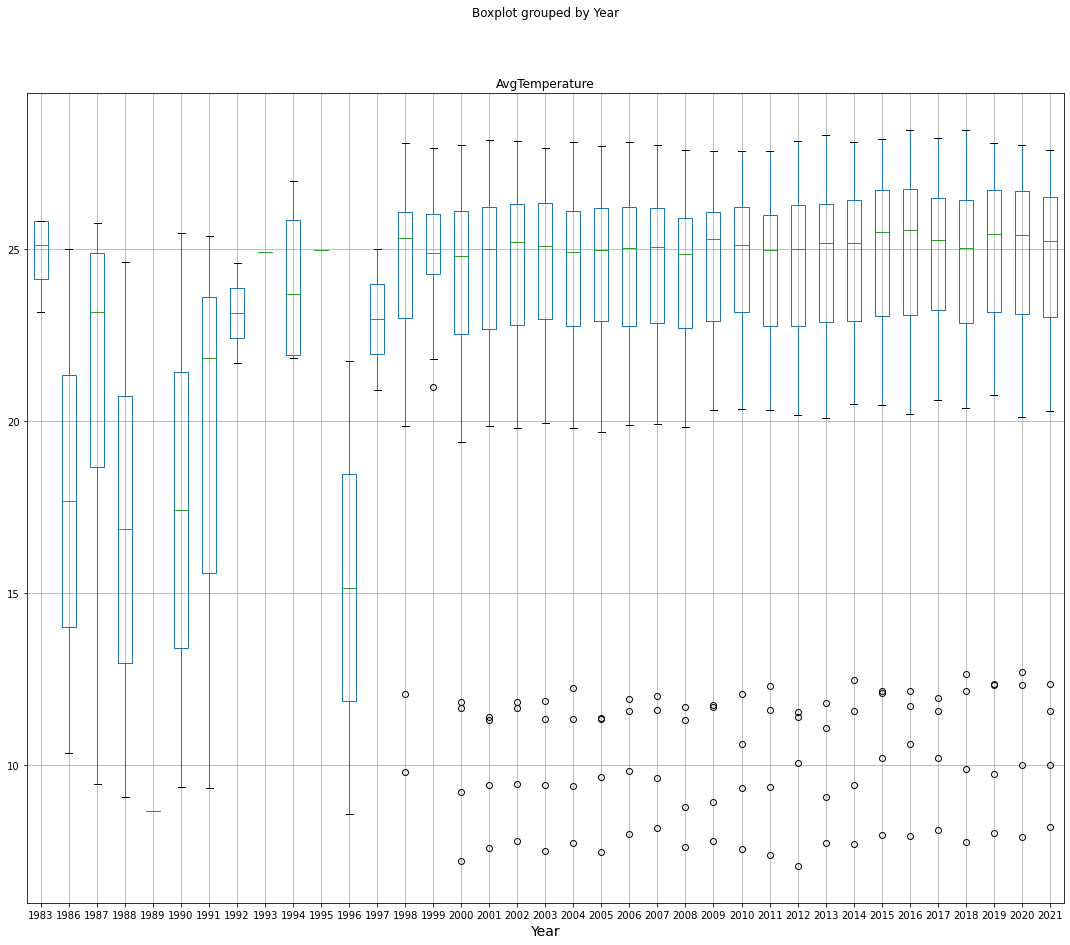

In [131]:
Data_full.boxplot(column='AvgTemperature', by='Year', fontsize=10, figsize=(18,15))

The find_outliers function has detected all the cold climates as outliers, so it may not be the most reliable method of detecting outliers.

In [132]:
outliers = find_outliers(Data_full, 'AvgTemperature')
outliers

,Country,Year,Percent Bleached,AvgTemperature
173,China,2000,NaN,7.21
174,China,2001,NaN,7.59
175,China,2002,1.875000,7.79
176,China,2003,2.236111,7.50
177,China,2004,0.270833,7.73
...,...,...,...,...
1011,United States,2017,13.341803,10.21
1012,United States,2018,NaN,9.87
1013,United States,2019,NaN,9.72
1014,United States,2020,NaN,10.00


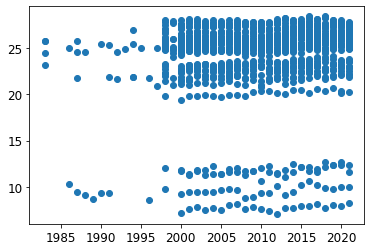

In [133]:
plt.scatter(Data_full['Year'], Data_full['AvgTemperature'])

There appear to no longer be outliers in the AvgTemperature column!

Let's take a look at just the warm regions

In [134]:
Temp_15 = Data_full[Data_full['AvgTemperature'] > 15]
Temp_15

,Country,Year,Percent Bleached,AvgTemperature
0,American Samoa,1994,35.000000,26.98
1,American Samoa,2000,NaN,27.49
2,American Samoa,2001,2.500000,28.00
3,American Samoa,2002,7.521739,28.00
4,American Samoa,2003,15.000000,27.43
...,...,...,...,...
1034,Vietnam,2017,0.000000,24.82
1035,Vietnam,2018,NaN,24.80
1036,Vietnam,2019,NaN,25.40
1037,Vietnam,2020,NaN,25.22


In [135]:
outliers = find_outliers(Temp_15, 'AvgTemperature')
outliers

,Country,Year,Percent Bleached,AvgTemperature


Excluding the colder climates, we can see a very slight trend of increasing temperatures.

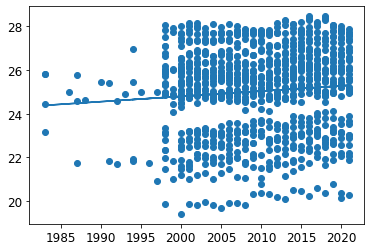

In [136]:
plt.scatter(Temp_15['Year'], Temp_15['AvgTemperature'])
z = np.polyfit(Temp_15['Year'], Temp_15['AvgTemperature'], 1)
p = np.poly1d(z)
plt.plot(Temp_15['Year'], p(Temp_15['Year']))

Now let's look at %Bleached, before any imputation is done.

<AxesSubplot:title={'center':'Percent Bleached'}, xlabel='Year'>

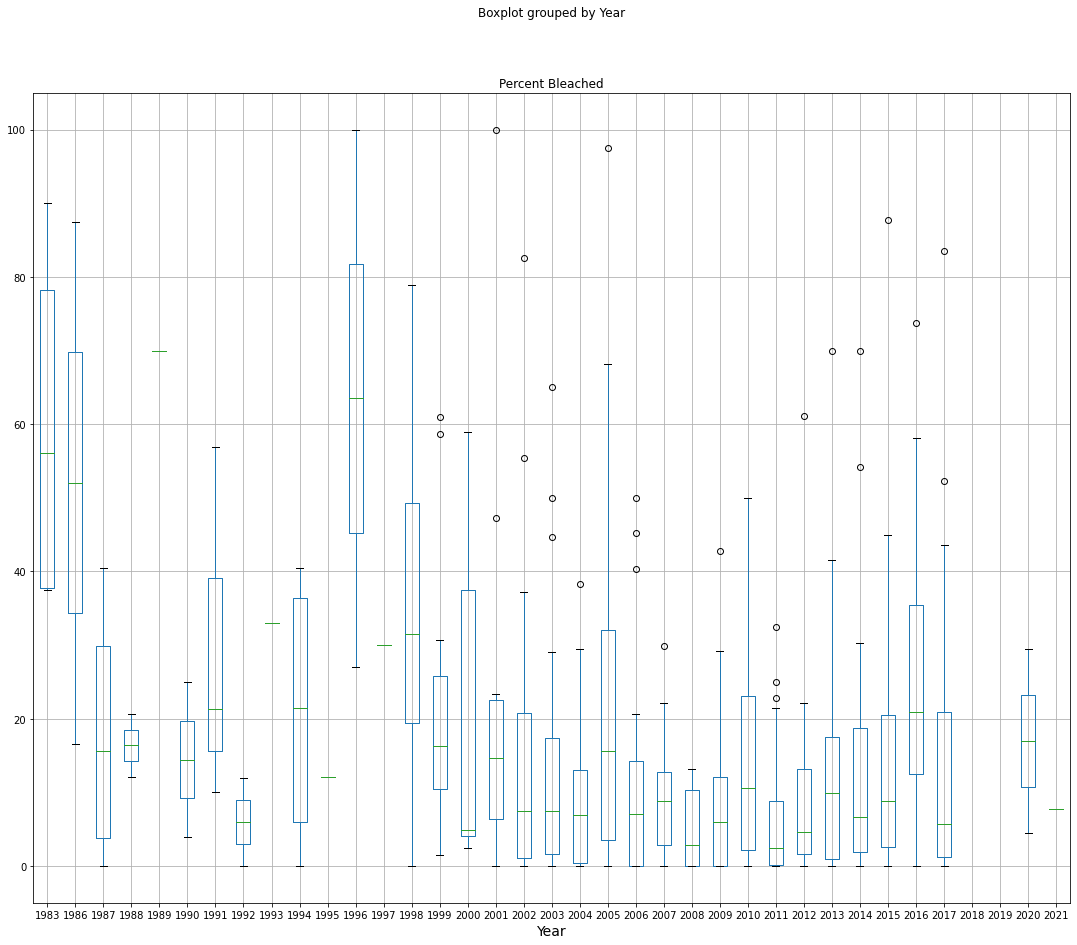

In [137]:
Data_full.boxplot(column='Percent Bleached', by='Year', fontsize=10, figsize=(18,15))

There appears to be a steady increase in temperature. Let's extrapolate this and predict into the future and see what kinds of temperatures we may eventually have.

# Coral Analysis: AvgTemperature Regression

Now we will predict AvgTemperature through both Country and Year, and %Bleached through AvgTemperature. Since we have 40+ countries, instead of doing an encoded multiple regression, I am going to attempt to iterate through a list of each Country so we only have a linear regression of Year vs AvgTemperature, and a Poisson regression of AVgTemperature vs %Bleached, per each Country.

In [138]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

When predicting into the future, I decided it would be best to extrapolate into the next ten years only, as by then the pattern of whether %Bleached is increasing or not becomes apparent enough.

In [139]:
new_years = [*range(2000, 2033, 1)]
new_years = pd.DataFrame(new_years, columns=['Year'])
Data_full2 = Data_full

Florida itself does not have enough information so we need to preemptively remove it, otherwise it would be impossible to break into training and test data. <br>
We take the unique names for Countries as a list here to iterate through when the training models are trained and used for predictions by each Country.

In [140]:
Data_full2 = Data_full2[Data_full2['Country'] != 'Florida, US']
Countries = Data_full2['Country'].unique()
Countries

array(['American Samoa', 'Australia', 'Bahamas', 'Belize', 'Brazil',
       'British Virgin Islands', 'Cambodia', 'China', 'Colombia',
       'Comoros', 'Cuba', 'Egypt', 'Fiji', 'France', 'French Polynesia',
       'Guam', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Japan',
       'Kenya', 'Madagascar', 'Malaysia', 'Maldives', 'Mauritius',
       'Mexico', 'New Caledonia', 'Northern Mariana Islands', 'Palau',
       'Panama', 'Philippines', 'Puerto Rico', 'Reunion', 'Seychelles',
       'Solomon Islands', 'Taiwan', 'Tanzania', 'Thailand',
       'Trinidad and Tobago', 'Turks and Caicos Islands', 'United States',
       'Vietnam'], dtype=object)

Before extrapolating, it's important to impute any missing %Bleached values, using the existing AvgTemperatures pertaining to existing %Bleached information for training, and missing %Bleached information to be replaced as the predictions made. <br>
Iterating through each Country, features with null %Bleached information are found, and features and the response with null information are made to train our Poisson Regressor.<br>
We get our %Bleached missing values after using model.predict on our features pertaining to null information.<br>
Using a combination of .isna() to locate areas of missing information and both .iloc() and .loc() to replace null information with our predicted values cycling through each Country, we now have a full contemporary dataset.

In [141]:
Data_full3 = pd.DataFrame() 
for x in Countries:
    dummy = Data_full2.loc[Data_full2['Country'] == x]
    features_nan = dummy[dummy['Percent Bleached'].isnull()]
    features_nan = features_nan.drop(['Country', 'Year', 'Percent Bleached'], axis=1)
    dummy_no_nan = dummy.dropna()
    features_no_nan = dummy_no_nan.drop(['Country', 'Year', 'Percent Bleached'], axis=1)
    response_no_nan = dummy_no_nan.drop(['Year', 'Country', 'AvgTemperature'], axis=1)
    clf1 = linear_model.PoissonRegressor()
    clf1.fit(features_no_nan, response_no_nan)
    missing_values = clf1.predict(features_nan)
    missing_values = pd.DataFrame(missing_values, columns=['Percent Bleached'])
    dummy.loc[dummy['Percent Bleached'].isna(),'Percent Bleached']=missing_values['Percent Bleached'].iloc[:dummy['Percent Bleached'].isna().sum()].tolist()
    Data_full3 = pd.concat([Data_full3, dummy])
Data_full3

,Country,Year,Percent Bleached,AvgTemperature
0,American Samoa,1994,35.000000,26.98
1,American Samoa,2000,24.608321,27.49
2,American Samoa,2001,2.500000,28.00
3,American Samoa,2002,7.521739,28.00
4,American Samoa,2003,15.000000,27.43
...,...,...,...,...
1034,Vietnam,2017,0.000000,24.82
1035,Vietnam,2018,5.881810,24.80
1036,Vietnam,2019,11.928296,25.40
1037,Vietnam,2020,9.648464,25.22


Now, it's time for the last big push!<br>
This segment iterates through Countries like the imputation segment.<br>
The dummy Dataframe containing the Country information is grouped by Year and then has the AvgTemp and %Bleached data aggregated by mean, which allows for better linear relationships to be found.<br>
Features and responses are then found, where 2 refers to the data used to train and test the Linear Regression of AvgTemperature into 2032, and 4 refers to the data used to train and test the Poisson Regression of %Bleached into 2032 using the existing and the later extrapolated AvgTemperature.<br>
Alongside these two models is a Dummy model for each, which allows for a baseline comparison of errors.<br>
Years is used to predict AvgTemperature, and then that AvgTemperature is used to predict %Bleached, and mean squared error is calculated using the model and it's dummy counterparts, and printed out for each Country.<br>
Once this is done for each Country, the new data is concatenated to the full dataset, sorted by Country and Year, and then aggregated via mean.

In [142]:
Data_full4 = pd.DataFrame() 
from sklearn.dummy import DummyRegressor
for x in Countries:
    dummy = Data_full3.loc[Data_full3['Country'] == x]            #Locate rows of the current Country iteration
    dummy = dummy.groupby(['Year', 'Country'], as_index=False).agg({'Percent Bleached':'mean','AvgTemperature':'mean'})
    #Aggregate data per Country and Year by mean, which allows for accurate Yearly prediction 
    features_2 = dummy.drop(['Country', 'AvgTemperature', 'Percent Bleached'], axis=1)
    response_2 = dummy.drop(['Year', 'Country', 'Percent Bleached'], axis=1)
    features_4 = dummy.drop(['Country', 'Year', 'Percent Bleached'], axis=1)
    response_4 = dummy.drop(['Year', 'Country', 'AvgTemperature'], axis=1)
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, response_2, test_size=0.25, random_state=42)
    X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(features_4, response_4, test_size=0.25, random_state=42)
    reg_model = LinearRegression()                                #Set up Linear Regressor to find Percent Bleached
    reg_model.fit(X_train_2, y_train_2)
    clf2 = linear_model.PoissonRegressor(max_iter=100)                        #Set up Poisson Regressor to find Percent Bleached
    clf2.fit(X_train_4, y_train_4)
    dummy_reg = DummyRegressor(strategy='mean')                   #Set up dummy Regressor for baseline comparison
    dummy_reg.fit(X_train_2, y_train_2)
    dummy_pred = dummy_reg.predict(X_test_2)
    dummy_reg.fit(X_train_4, y_train_4)
    dummy_pred2 = dummy_reg.predict(X_test_4)
    dummy_f = pd.DataFrame()                                      #Set up dummy DF
    exclude = new_years['Year'].isin(dummy['Year'])               #Get rid of Years in new_years that are already present in Country
    new_years.drop(new_years[exclude].index, inplace = True)
    dummy_f['Year'] = new_years['Year']                           #Add new years to dummy DF
    dummy_f['AvgTemperature'] = reg_model.predict(dummy_f)        #Use LinearRegression to find AvgTemp from Year
    dummy_f['Country'] = x                                        #Set the Country to the current Country itertion
    dummy_f2 = pd.DataFrame()                                     #Set up another dummy DF
    dummy_f2['Year'] = dummy_f['Year']                            #Pass the Year and AvgTemp from the first dummy to the new one
    dummy_f2['AvgTemperature'] = dummy_f['AvgTemperature']
    dummy_f2['Country'] = x
    dummy_f2['Percent Bleached'] = clf2.predict(dummy_f['AvgTemperature'].values.reshape(-1,1))#Predict %Bleached using AvgTemp
    Data_full4 = pd.concat([Data_full4, dummy_f2])                 #Concat the dummy DF to our main DF
    print('Country: ', x)
    preds2 = reg_model.predict(X_test_2)                           #Find base predictions to display Linear model error
    print('Dummy AvgTemp Mean squared error: ', mean_squared_error(y_test_2, dummy_pred))
    print('Linear AvgTemp Mean squared error: ', mean_squared_error(y_test_2, preds2))
    preds4 = clf2.predict(X_test_4)                                 #Find base predictions to display Poisson model error
    print('Dummy %Bleached Mean squared error: ', mean_squared_error(y_test_4, dummy_pred2))
    print('Poisson %Bleached Mean squared error: ', mean_squared_error(y_test_4, preds4))
    new_years = [*range(2000, 2033, 1)]
    new_years = pd.DataFrame(new_years, columns=['Year'])
    Data_full4 = pd.concat([Data_full4, new_years])
Data_full4 = pd.concat([Data_full4, Data_full3])
Data_full4 = Data_full4.sort_values(by = ['Country', 'Year'])      #Sort for easier viewing
Data_full4 = Data_full4.groupby(['Country', 'Year'], as_index=False).agg({'Percent Bleached':'mean','AvgTemperature':'mean'})
#Aggregate data so that data can be viewed by Country by Year

Country:  American Samoa
Dummy AvgTemp Mean squared error:  0.09028021914648234
Linear AvgTemp Mean squared error:  0.13772136649659927
Dummy %Bleached Mean squared error:  56.32389283603917
Poisson %Bleached Mean squared error:  49.9821926289614
Country:  Australia
Dummy AvgTemp Mean squared error:  0.14280685714277652
Linear AvgTemp Mean squared error:  0.12491589869267385
Dummy %Bleached Mean squared error:  202.85008477506315
Poisson %Bleached Mean squared error:  188.1610019100152
Country:  Bahamas
Dummy AvgTemp Mean squared error:  0.37811059027777827
Linear AvgTemp Mean squared error:  0.213282538685043
Dummy %Bleached Mean squared error:  131.15584207633262
Poisson %Bleached Mean squared error:  118.87163751257671
Country:  Belize
Dummy AvgTemp Mean squared error:  0.061866975308639084
Linear AvgTemp Mean squared error:  0.06916137053077666
Dummy %Bleached Mean squared error:  240.82873701816072
Poisson %Bleached Mean squared error:  250.03170166726827
Country:  Brazil
Dummy Av

In [143]:
Data_full4

,Country,Year,Percent Bleached,AvgTemperature
0,American Samoa,1994,35.000000,26.980000
1,American Samoa,2000,24.608321,27.490000
2,American Samoa,2001,2.500000,28.000000
3,American Samoa,2002,7.521739,28.000000
4,American Samoa,2003,15.000000,27.430000
...,...,...,...,...
1487,Vietnam,2028,5.499454,25.279485
1488,Vietnam,2029,5.520211,25.301516
1489,Vietnam,2030,5.541047,25.323546
1490,Vietnam,2031,5.561961,25.345577


There are a few Countries that clearly are outliers in terms of model quality, so it's best to remove them before exporting our final product.

In [144]:
Data_full4 = Data_full4[Data_full4['Country'] != 'Taiwan']
Data_full4 = Data_full4[Data_full4['Country'] != 'Japan']
Data_full4 = Data_full4[Data_full4['Country'] != 'Maldives']
Data_full4 = Data_full4[Data_full4['Country'] != 'Reunion']
Data_full4 = Data_full4[Data_full4['Country'] != 'United States']

In [145]:
Data_full4.to_csv('Country_Year_Bleached_Temperature.csv')

## Brief Infographic Preview

<AxesSubplot:xlabel='Percent Bleached', ylabel='Count'>

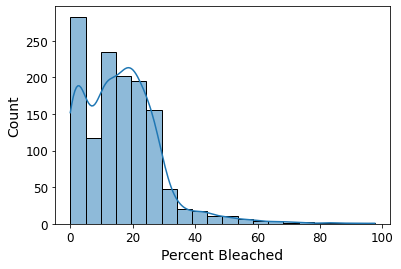

In [146]:
sns.histplot(Data_full4['Percent Bleached'], bins=20, kde=True)

<AxesSubplot:xlabel='Year', ylabel='Percent Bleached'>

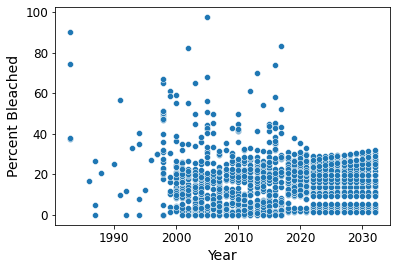

In [147]:
sns.scatterplot(x=Data_full4['Year'], y=Data_full4['Percent Bleached'])

<AxesSubplot:xlabel='Year', ylabel='AvgTemperature'>

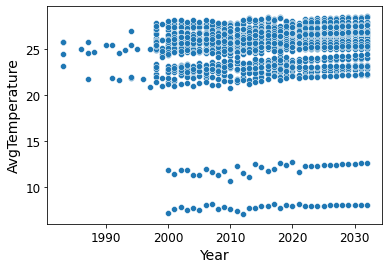

In [148]:
sns.scatterplot(x=Data_full4['Year'], y=Data_full4['AvgTemperature'])

# Closing Thoughts

This project has been a journey for me, despite how thorough my original proposal was. While the only thing that really changed was dropping the Major City Temperature dataset, I did learn a lot about Python and ways to manipulate data within it, such as how lambda functions work, and how lists can work alongside dataframes to simulate multi-level modelling.<br>
The biggest takeaway for me is that being transparent with your data manipulation is key. As long as I state my intentions, I can do whatever I need to. Here are the manipulations put into a list:<br>
- All columns aside from important information were removed.
- Percent Bleached was found as the combination of both minimum and maximum percent bleached, added and divided by 2.
- Values under 1 but greater than 0 were multiplied by 100 (twice if necessary) so those data points conformed to the 100-0 range.
- Countries with less than 100 Bleached Percentages were discarded.
- Country Temperature information was founded with a Timeseries pertaining to each country, and merged using lambda.
- Missing Percent Bleached data was discarded if it occured before 2000.
- Missing Percent Bleached data after 2000 was inferred and imputed using a Poisson Regressor.
- Using this full dataset, Average Surface Temperature was extrapolated using Linear Regression on new Years 2022-2032.
- New Percent Bleached data was found using the extrapolated Average Surface Temperature with a Poisson Regressor.<br>

Through these steps I have created a dataset fit for use on a Qlik dashboard which may visualize my hypothesis that Average Surface Temperature positively correlates with Percent Bleached coral.